In [1]:
# import the required libraries

import pandas as pd
import numpy as np 
import seaborn as sns # import for visualization
import matplotlib.pyplot as plt # import for ploting package

import warnings
warnings.filterwarnings('ignore')

C:\Users\91850\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
# Importing the csv file using pandas

df = pd.read_csv("forecast.csv")
df

station        Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  \
0         1.0  30-06-2013          28.7          21.4    58.255688   
1         2.0  30-06-2013          31.9          21.6    52.263397   
2         3.0  30-06-2013          31.6          23.3    48.690479   
3         4.0  30-06-2013          32.0          23.4    58.239788   
4         5.0  30-06-2013          31.4          21.9    56.174095   
...       ...         ...           ...           ...          ...   
7747     23.0  30-08-2017          23.3          17.1    26.741310   
7748     24.0  30-08-2017          23.3          17.7    24.040634   
7749     25.0  30-08-2017          23.2          17.4    22.933014   
7750      NaN         NaN          20.0          11.3    19.794666   
7751      NaN         NaN          37.6          29.9    98.524734   

      LDAPS_RHmax  LDAPS_Tmax_lapse  LDAPS_Tmin_lapse   LDAPS_WS    LDAPS_LH  \
0       91.116364         28.074101         23.006936   6.818887   69.451805   
1       90.604721         29.850689         24.035009   5.691890   51.937448   
2       83.973587         30.091292         24.565633   6.138224   20.573050   
3       96.483688         29.704629         23.326177   5.650050   65.727144   
4       90.155128         29.113934         23.486480   5.735004  107.965535   
...           ...               ...               ...        ...         ...   
7747    78.869858         26.352081         18.775678   6.148918   72.058294   
7748    77.294975         27.010193         18.733519   6.542819   47.241457   
7749    77.243744         27.939516         18.522965   7.289264    9.090034   
7750    58.936283         17.624954         14.272646   2.882580  -13.603212   
7751   100.000153         38.542255         29.619342  21.857621  213.414006   

      ...  LDAPS_PPT2  LDAPS_PPT3  LDAPS_PPT4      lat      lon       DEM  \
0     ...    0.000000    0.000000    0.000000  37.6046  126.991  212.3350   
1     ...    0.000000    0.000000    0.000000  37.6046  127.032   44.7624   
2     ...    0.000000    0.000000    0.000000  37.5776  127.058   33.3068   
3     ...    0.000000    0.000000    0.000000  37.6450  127.022   45.7160   
4     ...    0.000000    0.000000    0.000000  37.5507  127.135   35.0380   
...   ...         ...         ...         ...      ...      ...       ...   
7747  ...    0.000000    0.000000    0.000000  37.5372  126.891   15.5876   
7748  ...    0.000000    0.000000    0.000000  37.5237  126.909   17.2956   
7749  ...    0.000000    0.000000    0.000000  37.5237  126.970   19.5844   
7750  ...    0.000000    0.000000    0.000000  37.4562  126.826   12.3700   
7751  ...   21.621661   15.841235   16.655469  37.6450  127.135  212.3350   

         Slope  Solar radiation  Next_Tmax  Next_Tmin  
0     2.785000      5992.895996       29.1       21.2  
1     0.514100      5869.312500       30.5       22.5  
2     0.266100      5863.555664       31.1       23.9  
3     2.534800      5856.964844       31.7       24.3  
4     0.505500      5859.552246       31.2       22.5  
...        ...              ...        ...        ...  
7747  0.155400      4443.313965       28.3       18.1  
7748  0.222300      4438.373535       28.6       18.8  
7749  0.271300      4451.345215       27.8       17.4  
7750  0.098475      4329.520508       17.4       11.3  
7751  5.178230      5992.895996       38.9       29.8  

[7752 rows x 25 columns]

In [3]:
df.columns.to_series().groupby(df.dtypes).groups

{float64: ['station', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin', 'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4', 'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon', 'DEM', 'Slope', 'Solar radiation', 'Next_Tmax', 'Next_Tmin'], object: ['Date']}

**Comment:**
- All variable are Numerical in nature.
- Next_Tmax and Next_Tmin are Target variable.
- This dataset contain 7752 Rows and 25 columns.
# Statistical Analysis

**Since dataset is latge, let check for any entry which is repeated or duplicated in dataset.**

In [4]:
df.duplicated().sum() # This will check if any duplicate entry or duplicate row with same name.

0

In [5]:
# Let check if any whitespace, 'NA' or '-' exist in dataset.

df.isin([' ', 'NA', '-']).sum().any()

False

- No Duplicate entry in dataset.
- No whitespace, NA, '-' exist in dataset.

# Missing value check

In [6]:
missing = df.isnull().sum().sort_values(ascending=False)
percentage = (missing/len(df))*100
print(pd.concat([missing, percentage], axis=1, keys=['Missing Values', '% Missing data']))

                  Missing Values  % Missing data
LDAPS_CC3                     75        0.967492
LDAPS_PPT4                    75        0.967492
LDAPS_PPT2                    75        0.967492
LDAPS_PPT1                    75        0.967492
LDAPS_CC4                     75        0.967492
LDAPS_CC2                     75        0.967492
LDAPS_CC1                     75        0.967492
LDAPS_LH                      75        0.967492
LDAPS_WS                      75        0.967492
LDAPS_Tmin_lapse              75        0.967492
LDAPS_Tmax_lapse              75        0.967492
LDAPS_RHmax                   75        0.967492
LDAPS_RHmin                   75        0.967492
LDAPS_PPT3                    75        0.967492
Present_Tmin                  70        0.902993
Present_Tmax                  70        0.902993
Next_Tmax                     27        0.348297
Next_Tmin                     27        0.348297
Date                           2        0.025800
station             

**As missing values present are less than 1%. So We can directly drop these missing values.**

In [7]:
print("We had {}  Rows and {} columns before dropping null values.".format(df.shape[0], df.shape[1]))
df.dropna(inplace=True)
print("We have {} Rows and {} columns after dropping null values.".format(df.shape[0], df.shape[1]))

We had 7752  Rows and 25 columns before dropping null values.
We have 7588 Rows and 25 columns after dropping null values.


**Finally, No missing Value is Present.**

We are Now Yes To Go Further!!!

In [8]:
# Converting Date datatypes and splitting date into date, month and year.

df['Date'] = pd.to_datetime(df['Date'])
df['Day'] = df['Date'].apply(lambda x:x.day)
df['Month'] = df['Date'].apply(lambda x:x.month)
df['Year'] = df['Date'].apply(lambda x:x.year)
df.head()

station       Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0      1.0 2013-06-30          28.7          21.4    58.255688    91.116364   
1      2.0 2013-06-30          31.9          21.6    52.263397    90.604721   
2      3.0 2013-06-30          31.6          23.3    48.690479    83.973587   
3      4.0 2013-06-30          32.0          23.4    58.239788    96.483688   
4      5.0 2013-06-30          31.4          21.9    56.174095    90.155128   

   LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  ...      lat  \
0         28.074101         23.006936  6.818887   69.451805  ...  37.6046   
1         29.850689         24.035009  5.691890   51.937448  ...  37.6046   
2         30.091292         24.565633  6.138224   20.573050  ...  37.5776   
3         29.704629         23.326177  5.650050   65.727144  ...  37.6450   
4         29.113934         23.486480  5.735004  107.965535  ...  37.5507   

       lon       DEM   Slope  Solar radiation  Next_Tmax  Next_Tmin  Day  \
0  126.991  212.3350  2.7850      5992.895996       29.1       21.2   30   
1  127.032   44.7624  0.5141      5869.312500       30.5       22.5   30   
2  127.058   33.3068  0.2661      5863.555664       31.1       23.9   30   
3  127.022   45.7160  2.5348      5856.964844       31.7       24.3   30   
4  127.135   35.0380  0.5055      5859.552246       31.2       22.5   30   

   Month  Year  
0      6  2013  
1      6  2013  
2      6  2013  
3      6  2013  
4      6  2013  

[5 rows x 28 columns]

Now to gain more insight in data, we will create additional columns with location of station in terms of city and respective state.

In [9]:
# Importing Reverse geocoder
import reverse_geocoder as rg
import pprint

In [10]:
geodata = []

def reverse_geocoordinates(coordinates):
    result = rg.search(coordinates)
    return(result)
if __name__=="__main__":
    coordinates = list(zip(df['lat'], df['lon']))
    data = reverse_geocoordinates(coordinates)
    geodata.append(data)
# Creating dataframe for geographical name
geo_names = pd.DataFrame(geodata).transpose()

Loading formatted geocoded file...


**We Have gather state and city name as per corresponding to it's latitude and longitude available. Now it is time incorporate state and city columns in out dataset.**

In [11]:
df['State'] = geo_names[0].apply(lambda x:x.get('admin1'))
df['City'] = geo_names[0].apply(lambda x:x.get('name'))

In [12]:
df.head()

station       Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0      1.0 2013-06-30          28.7          21.4    58.255688    91.116364   
1      2.0 2013-06-30          31.9          21.6    52.263397    90.604721   
2      3.0 2013-06-30          31.6          23.3    48.690479    83.973587   
3      4.0 2013-06-30          32.0          23.4    58.239788    96.483688   
4      5.0 2013-06-30          31.4          21.9    56.174095    90.155128   

   LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  ...       DEM  \
0         28.074101         23.006936  6.818887   69.451805  ...  212.3350   
1         29.850689         24.035009  5.691890   51.937448  ...   44.7624   
2         30.091292         24.565633  6.138224   20.573050  ...   33.3068   
3         29.704629         23.326177  5.650050   65.727144  ...   45.7160   
4         29.113934         23.486480  5.735004  107.965535  ...   35.0380   

    Slope  Solar radiation  Next_Tmax  Next_Tmin  Day  Month  Year  \
0  2.7850      5992.895996       29.1       21.2   30      6  2013   
1  0.5141      5869.312500       30.5       22.5   30      6  2013   
2  0.2661      5863.555664       31.1       23.9   30      6  2013   
3  2.5348      5856.964844       31.7       24.3   30      6  2013   
4  0.5055      5859.552246       31.2       22.5   30      6  2013   

         State     City  
0        Seoul    Seoul  
1        Seoul    Seoul  
2        Seoul    Seoul  
3        Seoul    Seoul  
4  Gyeonggi-do  Guri-si  

[5 rows x 30 columns]

In [13]:
df.describe()

station                           Date  Present_Tmax  Present_Tmin  \
count  7588.000000                           7588   7588.000000   7588.000000   
mean     13.014101  2015-07-27 18:22:12.208750592     29.748366     23.195809   
min       1.000000            2013-06-30 00:00:00     20.000000     11.300000   
25%       7.000000            2014-07-15 00:00:00     27.800000     21.600000   
50%      13.000000            2015-07-29 00:00:00     29.900000     23.400000   
75%      19.000000            2016-08-14 00:00:00     32.000000     24.800000   
max      25.000000            2017-08-30 00:00:00     37.600000     29.900000   
std       7.217858                            NaN      2.967401      2.400880   

       LDAPS_RHmin  LDAPS_RHmax  LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  \
count  7588.000000  7588.000000       7588.000000       7588.000000   
mean     56.724969    88.360823         29.620128         23.511786   
min      19.794666    58.936283         17.624954         14.272646   
25%      45.960243    84.203724         27.673756         22.086820   
50%      55.023199    89.784122         29.709537         23.758249   
75%      67.115099    93.742725         31.711109         25.155660   
max      98.524734   100.000153         38.542255         29.619342   
std      14.626559     7.199456          2.943496          2.342579   

          LDAPS_WS     LDAPS_LH  ...          lat         lon          DEM  \
count  7588.000000  7588.000000  ...  7588.000000  7588.00000  7588.000000   
mean      7.094097    62.492606  ...    37.544792   126.99142    61.918136   
min       2.882580   -13.603212  ...    37.456200   126.82600    12.370000   
25%       5.675358    37.206201  ...    37.510200   126.93700    28.700000   
50%       6.547838    56.898324  ...    37.550700   126.99500    45.716000   
75%       8.028960    84.235666  ...    37.577600   127.04200    59.832400   
max      21.857621   213.414006  ...    37.645000   127.13500   212.335000   
std       2.177034    33.686158  ...     0.050428     0.07922    54.323529   

             Slope  Solar radiation    Next_Tmax    Next_Tmin          Day  \
count  7588.000000      7588.000000  7588.000000  7588.000000  7588.000000   
mean      1.259755      5343.724208    30.241526    22.910820    15.939510   
min       0.098500      4329.520508    17.400000    11.300000     1.000000   
25%       0.271300      5001.485717    28.200000    21.300000     8.000000   
50%       0.618000      5441.987305    30.400000    23.100000    16.000000   
75%       1.767800      5729.485840    32.600000    24.600000    24.000000   
max       5.178200      5992.895996    38.900000    29.800000    31.000000   
std       1.372748       429.782561     3.111807     2.482256     8.906521   

             Month         Year  
count  7588.000000  7588.000000  
mean      7.465999  2014.991697  
min       6.000000  2013.000000  
25%       7.000000  2014.000000  
50%       7.000000  2015.000000  
75%       8.000000  2016.000000  
max       8.000000  2017.000000  
std       0.528635     1.410877  

[8 rows x 28 columns]

**Starting Exploring Present Temperature**

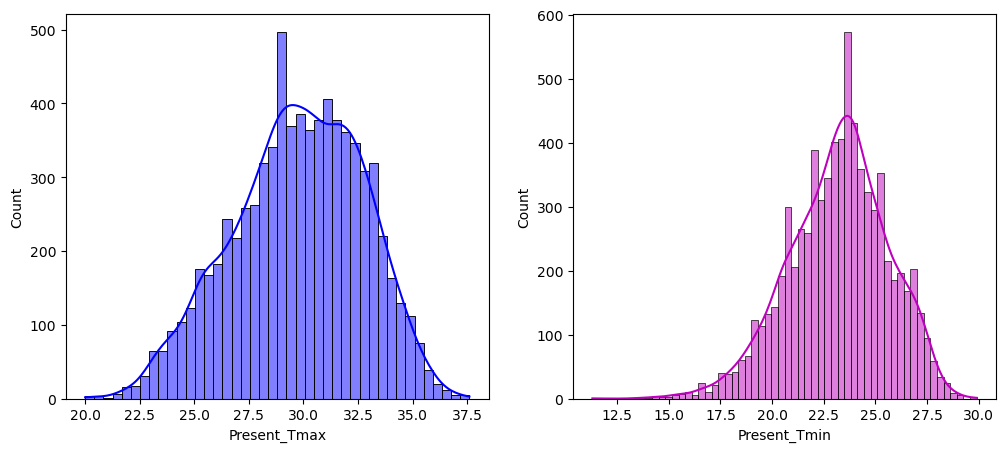

In [14]:
# Plotting histogram for present_Tmax and present_Tmin variables
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(df['Present_Tmax'], kde=True, color='b')
plt.subplot(1,2,2)
sns.histplot(df['Present_Tmin'], kde=True, color='m')
plt.show()

- For majority of reading Present Temperature Maximum varies in between 27.5 to 32.5
- For majority of reading Present Temperature Minimum varies in between 22.5 to 26 degree.

**Lets find out maximum and minimum Temperature over period**

In [15]:
print('Present Maximum Temperature Maxima in year 2013-2016 :',df.Present_Tmax.max())
print('Present Maximum Temperature Minima in year 2013-2016 :',df.Present_Tmax.min())
print(' Average Present Maximum Temperature in year 2013-2016 :',df.Present_Tmax.mean())
print('='*100)
print('Present Minimum Temperature Maxima in year 2013-2016 :',df.Present_Tmin.max())
print('Present Minimum Temperature Minima in year 2013-2016 :',df.Present_Tmin.min())
print('Average Present Minimum Temperature in year 2013-2016 :',df.Present_Tmin.mean())

Present Maximum Temperature Maxima in year 2013-2016 : 37.6
Present Maximum Temperature Minima in year 2013-2016 : 20.0
 Average Present Maximum Temperature in year 2013-2016 : 29.748365840801263
Present Minimum Temperature Maxima in year 2013-2016 : 29.9
Present Minimum Temperature Minima in year 2013-2016 : 11.3
Average Present Minimum Temperature in year 2013-2016 : 23.195809172377437


**Checking where actually these minima and maxima occur**

In [16]:
pd.set_option('display.max_columns', None)
df.loc[df.Present_Tmax==df.Present_Tmax.max()]

station       Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  \
5717     18.0 2016-08-11          37.6          26.8    44.254253   

      LDAPS_RHmax  LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  \
5717    87.745514         34.794021         27.150764  6.366598  111.225118   

      LDAPS_CC1  LDAPS_CC2  LDAPS_CC3  LDAPS_CC4  LDAPS_PPT1  LDAPS_PPT2  \
5717   0.218892   0.094288   0.004283   0.000343         0.0         0.0   

      LDAPS_PPT3  LDAPS_PPT4      lat      lon      DEM   Slope  \
5717         0.0         0.0  37.4832  127.024  56.4448  1.2313   

      Solar radiation  Next_Tmax  Next_Tmin  Day  Month  Year        State  \
5717      5082.563477       37.0       27.8   11      8  2016  Gyeonggi-do   

            City  
5717  Bucheon-si

In [17]:
df.loc[df.Present_Tmax==df.Present_Tmax.min()]

station       Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  \
7725      1.0 2017-08-30          20.0          15.1    35.652172   

      LDAPS_RHmax  LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  \
7725     89.97319         24.323737         16.128899  7.087329  108.981108   

      LDAPS_CC1  LDAPS_CC2  LDAPS_CC3  LDAPS_CC4  LDAPS_PPT1  LDAPS_PPT2  \
7725   0.046182   0.014955        0.0    0.00063         0.0         0.0   

      LDAPS_PPT3  LDAPS_PPT4      lat      lon      DEM  Slope  \
7725         0.0         0.0  37.6046  126.991  212.335  2.785   

      Solar radiation  Next_Tmax  Next_Tmin  Day  Month  Year State City  
7725       4614.76123       23.8       15.1   30      8  2017   NaN  NaN

In [18]:
df.loc[df.Present_Tmin==df.Present_Tmin.max()]

station       Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  \
2397     23.0 2014-08-02          35.3          29.9    53.946949   

      LDAPS_RHmax  LDAPS_Tmax_lapse  LDAPS_Tmin_lapse   LDAPS_WS    LDAPS_LH  \
2397    85.985161         30.912804         25.439537  13.011129  117.837212   

      LDAPS_CC1  LDAPS_CC2  LDAPS_CC3  LDAPS_CC4  LDAPS_PPT1  LDAPS_PPT2  \
2397   0.684685   0.448827   0.762858   0.635728    1.670126    0.005681   

      LDAPS_PPT3  LDAPS_PPT4      lat      lon      DEM   Slope  \
2397    0.248885    0.003176  37.5372  126.891  15.5876  0.1554   

      Solar radiation  Next_Tmax  Next_Tmin  Day  Month  Year        State  \
2397      5360.226563       31.3       24.8    2      8  2014  Gyeonggi-do   

         City  
2397  Guri-si

In [19]:
df.loc[df.Present_Tmin==df.Present_Tmin.min()]

station       Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  \
6116     17.0 2016-08-27          27.1          11.3    62.793823   

      LDAPS_RHmax  LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS  LDAPS_LH  \
6116    91.726936         23.529546         17.963487  7.984566  84.48145   

      LDAPS_CC1  LDAPS_CC2  LDAPS_CC3  LDAPS_CC4  LDAPS_PPT1  LDAPS_PPT2  \
6116   0.668264   0.410536   0.452879   0.627238    0.181458         0.0   

      LDAPS_PPT3  LDAPS_PPT4      lat      lon      DEM  Slope  \
6116    0.405181    1.015573  37.6181  127.099  53.4712  0.697   

      Solar radiation  Next_Tmax  Next_Tmin  Day  Month  Year  State   City  
6116      4539.616699       24.6       17.1   27      8  2016  Seoul  Seoul

**Observation:**
- Present Maximum Temperature Maxima over four year span recorded at station 18 on 2016-11-08 with Temp of 37.6 degree. Station 18 Located at Bucheon-si city of Gyeonggido state.
- Present Maximum Temperature Minima over four year span recorded at station 1 on 2017-08-30 with Temp of 20 degree.
- Present Maximum Temperature Maxima over four year span recorded at station 23 on 2014-02-08 with Temp of 29.9 degree. The station 23 is located in Gurisi of Gyeonggido state
- Present Maximum Temperature Minima over four year span recorded at station 17 on 2016-08-27 with Temp of 11.3 degree. The station 17 is located in seoul city.
- We get high value of solar radiation of high temperature day and Low radiation values at low temperature day.
- Maximum Humidity occur when global temeperature minima occur. This might implies that humidity and temperature are inversely related.We will try to verify this.
- Solar radiation has naturally going to have effect on wind speed,precipitation and humidity.

**Let Visualise & gain insight over this by plotting line plot over all station.**

**Line Plot of Present Temperature Maximum over each Station**

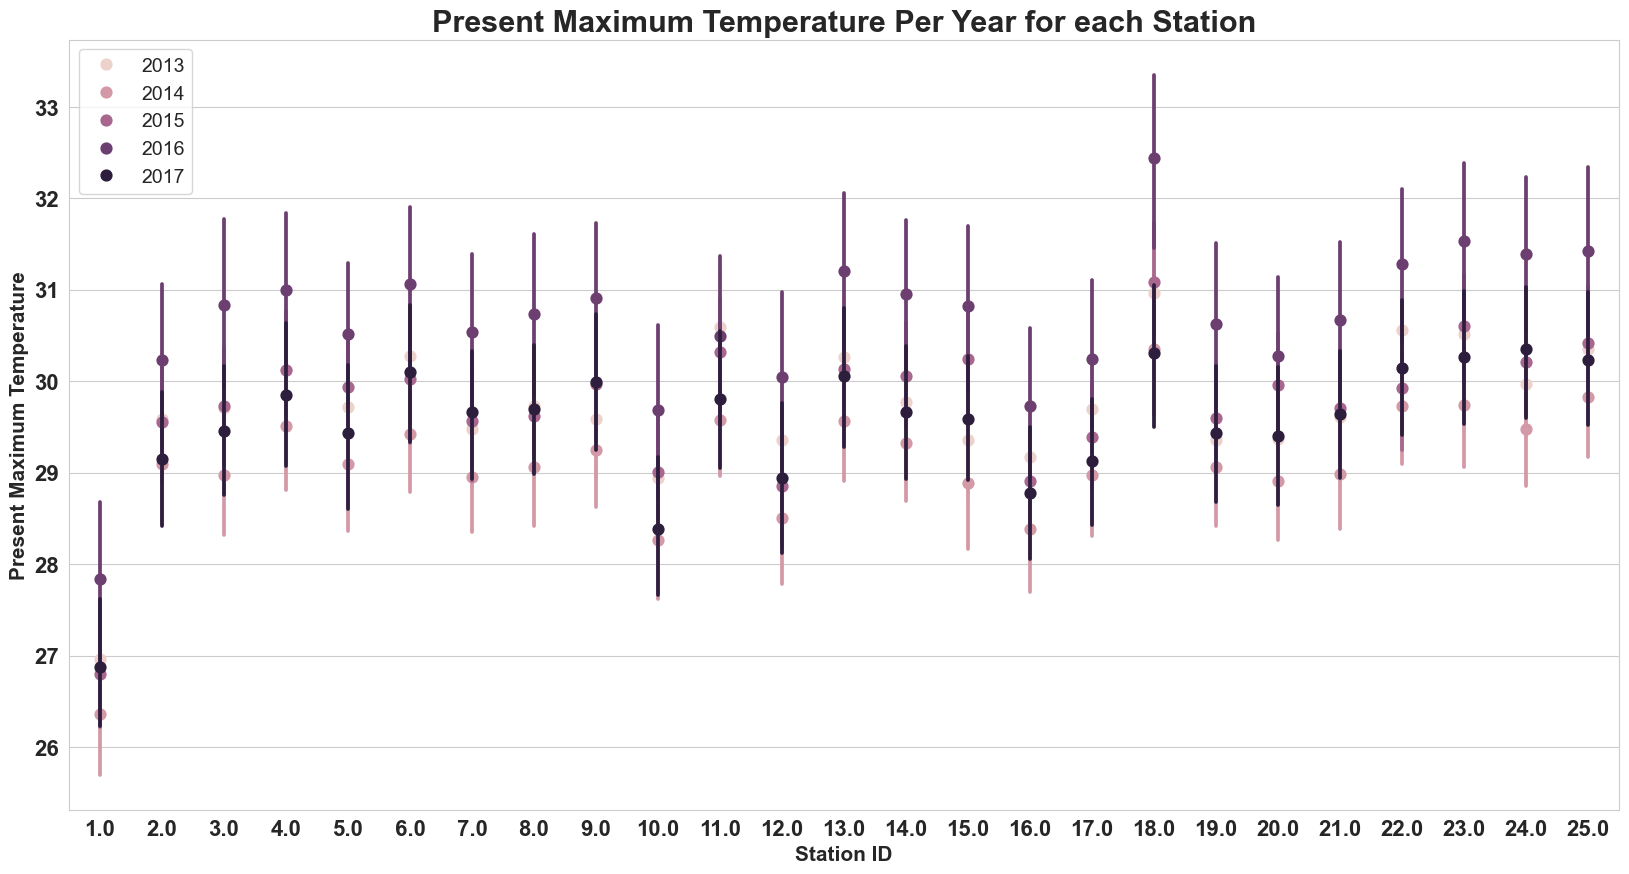

In [20]:
plt.figure(figsize=(20,10))
sns.set_style('whitegrid')
sns.pointplot(x='station', y='Present_Tmax', data=df, hue='Year',join=False)
plt.title('Present Maximum Temperature Per Year for each Station', fontsize=22, fontweight='bold')
plt.xlabel('Station ID',{'fontsize':15,'fontweight' :'bold'})
plt.ylabel('Present Maximum Temperature',{'fontsize':15,'fontweight' :'bold'})
plt.xticks(fontsize=16,fontweight ='bold')
plt.yticks(fontsize=16,fontweight ='bold')
plt.legend(fontsize=14)

**Observation:**
- Over all four year higher temperature recorded at station 18 in compare to rest.
- Station 1 is coolest station over all timeframe.
- We can see 2016 is hottest year and 2014 is coolest year. It will be interesting to explore these two year independently.
- Year 2017 is muchh cooler compare to Year 2016. precious relife to people in 2017!!!

**Line plot of Present Temperature Minimum over each Station**

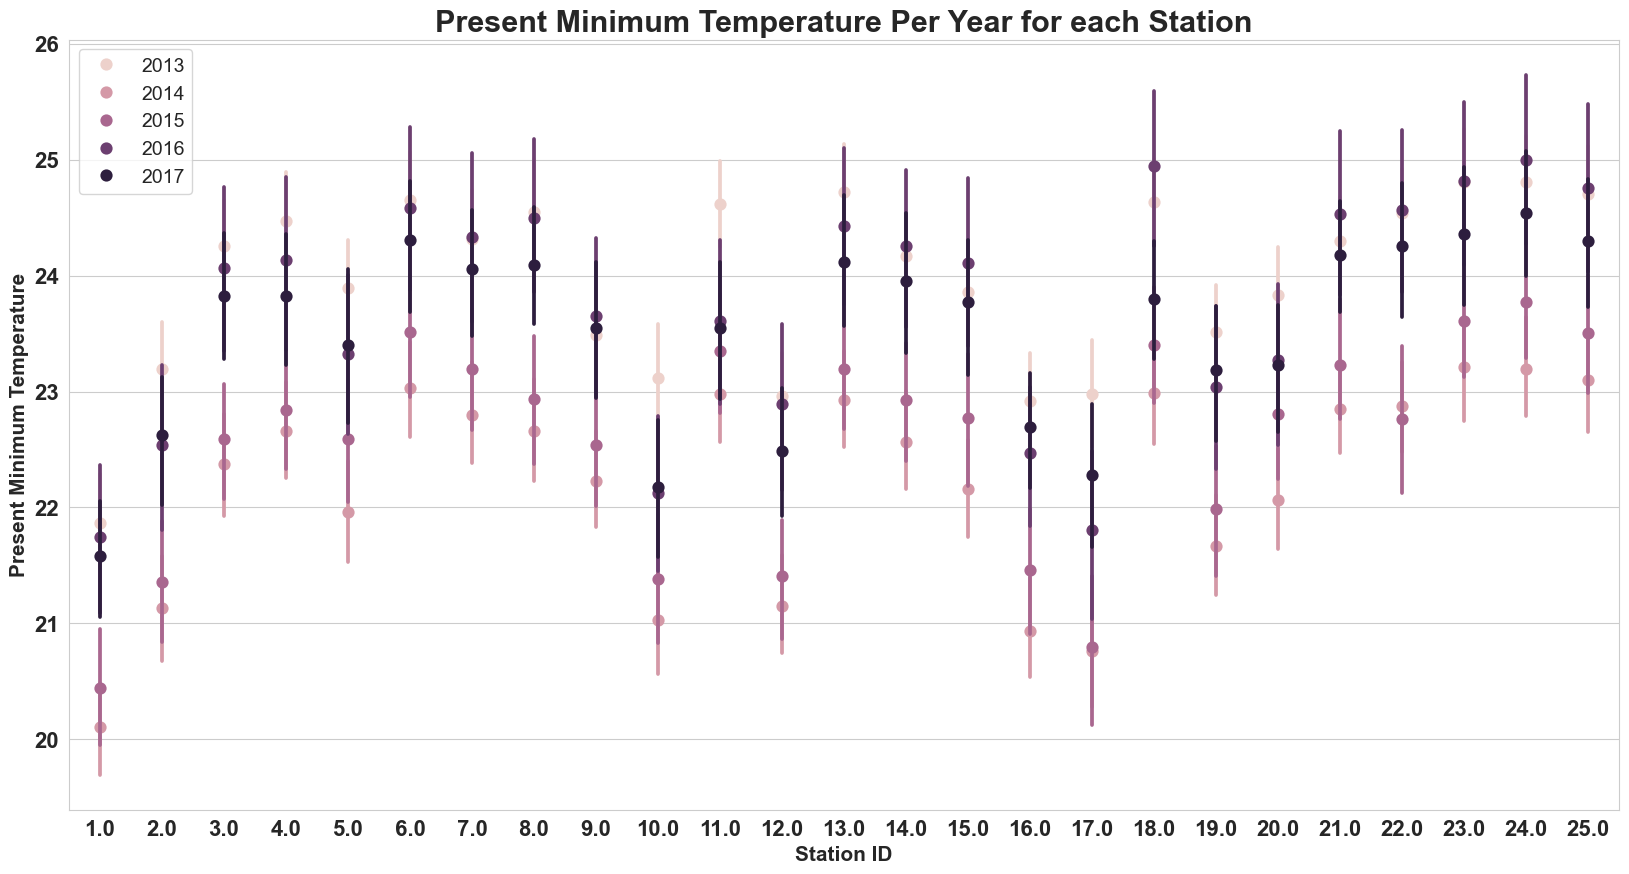

In [21]:
plt.figure(figsize=(20,10))
sns.set_style('whitegrid')
sns.pointplot(x='station', y='Present_Tmin', data=df, hue='Year',join=False)
plt.title('Present Minimum Temperature Per Year for each Station', fontsize=22, fontweight='bold')
plt.xlabel('Station ID',{'fontsize':15,'fontweight' :'bold'})
plt.ylabel('Present Minimum Temperature',{'fontsize':15,'fontweight' :'bold'})
plt.xticks(fontsize=16,fontweight ='bold')
plt.yticks(fontsize=16,fontweight ='bold')
plt.legend(fontsize=14)

**Observation on line plot of Present Minimum Temperature:**
- Year 2014 is coolest of all time frame
- Highest Present Minimum Temperature recorded at Station 24 inspite of Not having Highest Present Maximum Temperature. This is implies that over day period minimum temperature drop recorded at station 24.
- Station 1 is coolest station of all time followed by station 17. Must be tourist spot in Summer.

<Axes: xlabel='Month', ylabel='Solar radiation'>

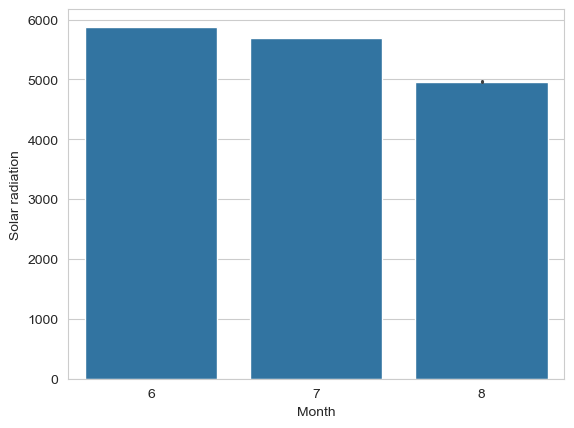

In [22]:
sns.barplot(x=df['Month'], y=df['Solar radiation'])

<Axes: xlabel='Next_Tmax', ylabel='Solar radiation'>

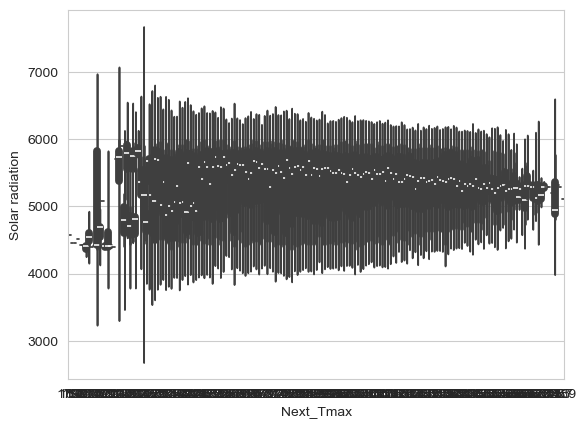

In [23]:
sns.violinplot(x=df['Next_Tmax'], y=df['Solar radiation'])

**Exploration of Target Variable**

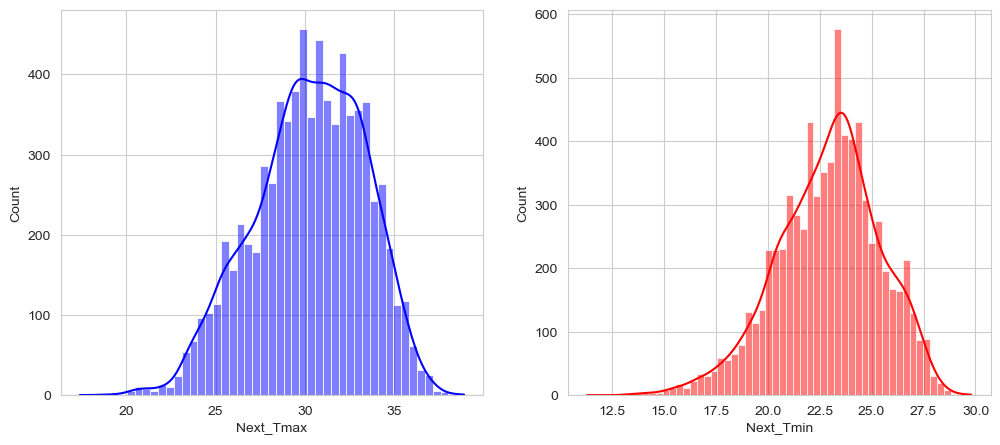

In [24]:
# Plotting histogram for target variables
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(df['Next_Tmax'],kde=True,color='b')
plt.subplot(1,2,2)
sns.histplot(df['Next_Tmin'],kde=True,color='r')
plt.show()

**Comment:**

We get same result as we get in case of present temperature.

- For majority of reading Next Temperature Maximum varies in between 27.5 to 32.5
- For majority of reading Next Temperature Minimum varies in between 22.5 to 26 degree.

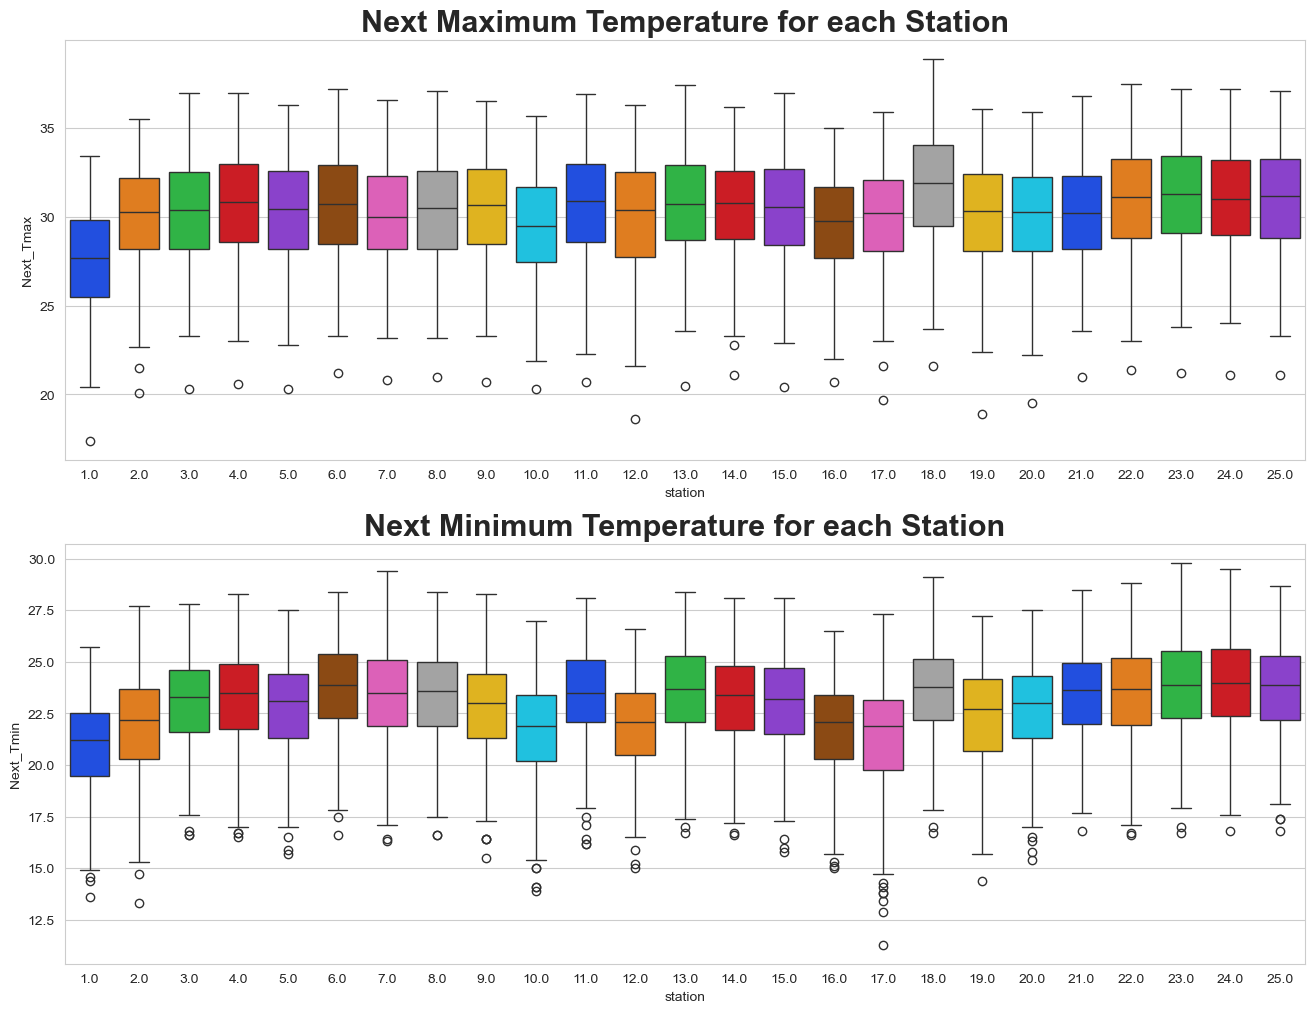

In [25]:
# Visualizing the realtion between station and target variables
plt.figure(figsize=(16,12))
plt.subplot(2,1,1)
sns.boxplot(x=df['station'],y=df['Next_Tmax'],data=df,palette="bright")
plt.title('Next Maximum Temperature for each Station', fontsize=22, fontweight='bold')
plt.subplot(2,1,2)
sns.boxplot(x=df['station'],y=df['Next_Tmin'],data=df,palette="bright")
plt.title('Next Minimum Temperature for each Station', fontsize=22, fontweight='bold')
plt.show()

From the box plot

- We can notice the station 18 has highest temperature collection for both Next_Tmax and Next_Tmin targets.
- Maximum temperature difference at same station occur in station 17.

**Next Maximum Temperature Vs Cloud cover**

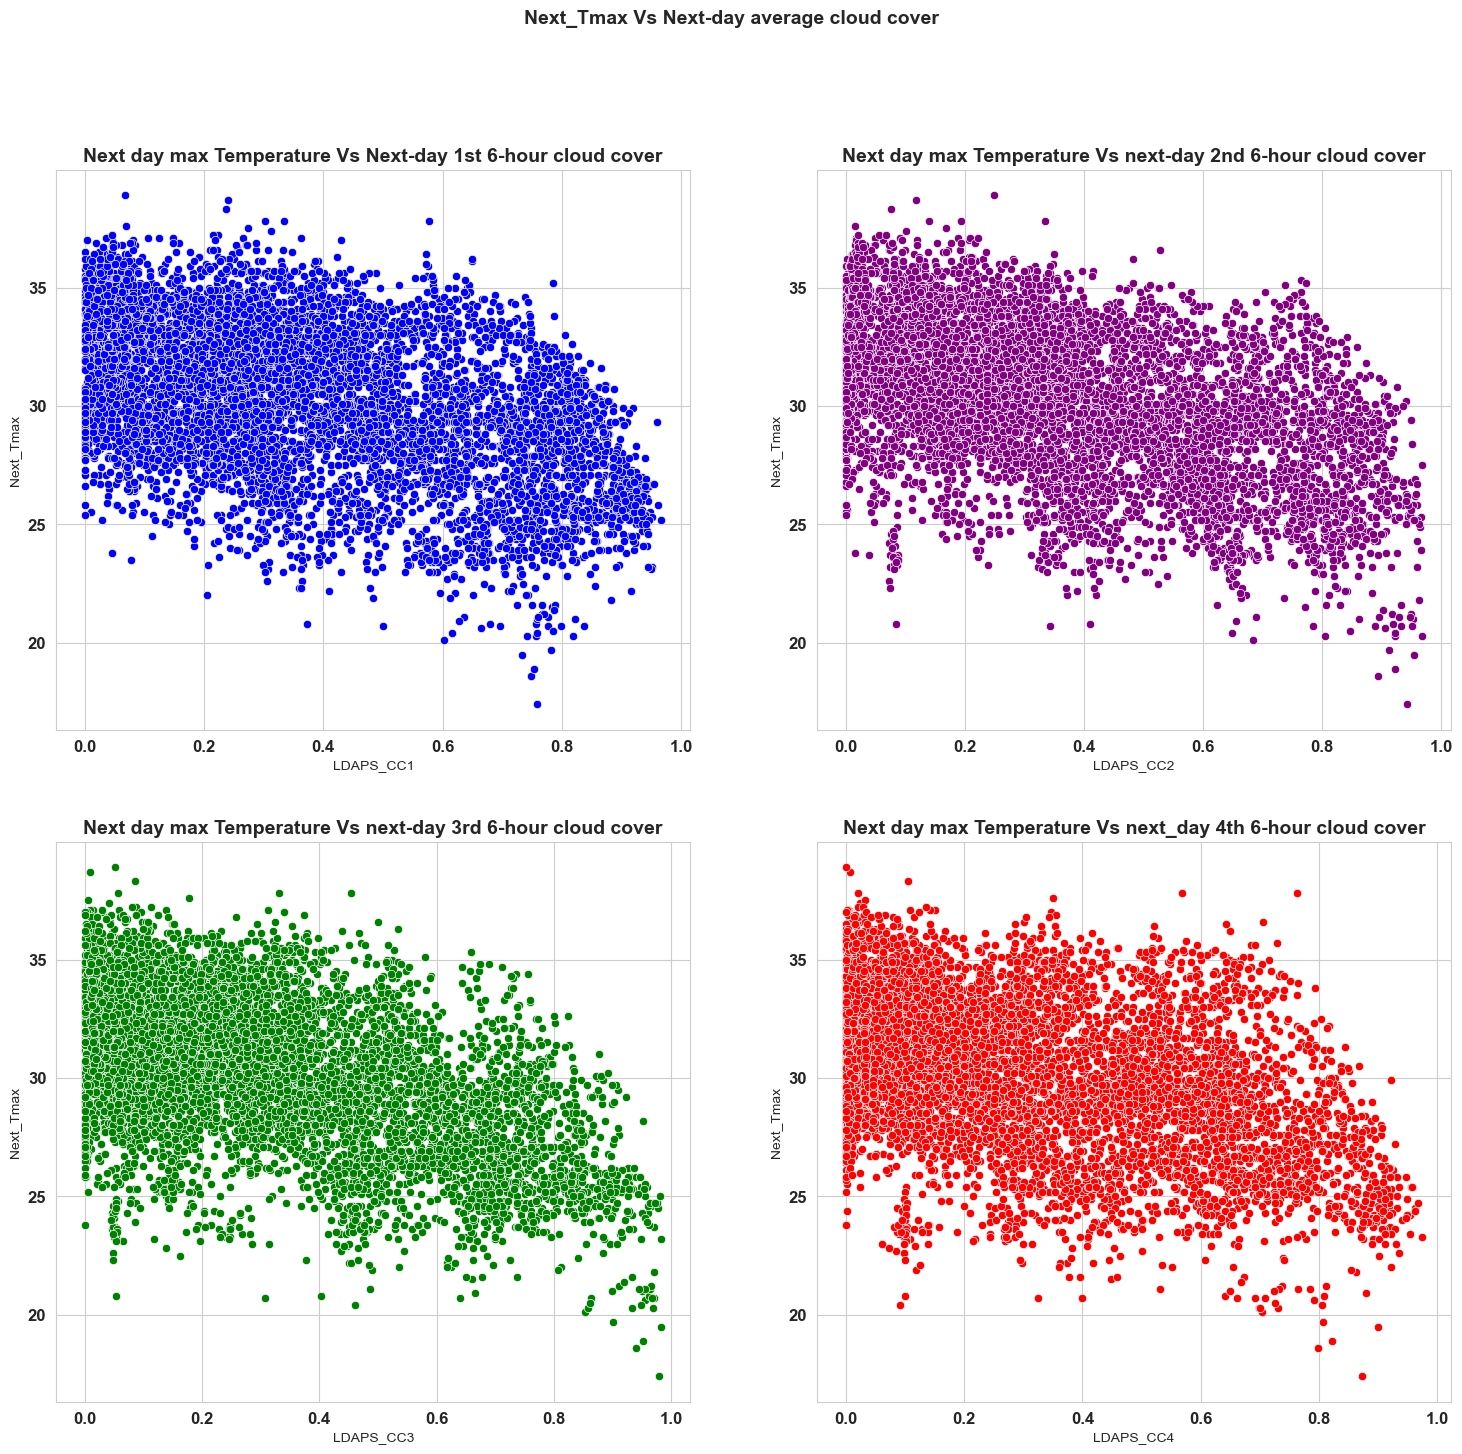

In [26]:
# Comparing Next day maximnum temperature and next day average cloud cover

plt.figure(figsize=(18,16))
plt.suptitle('Next_Tmax Vs Next-day average cloud cover',fontsize=14, fontweight='bold')

plt.subplot(2,2,1)
plt.title('Next day max Temperature Vs Next-day 1st 6-hour cloud cover',fontsize=14, fontweight='bold')
sns.scatterplot(x='LDAPS_CC1',y='Next_Tmax',data=df,color="blue")
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')

plt.subplot(2,2,2)
plt.title('Next day max Temperature Vs next-day 2nd 6-hour cloud cover',fontsize=14, fontweight='bold')
sns.scatterplot(x='LDAPS_CC2',y='Next_Tmax',data=df,color='purple')
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')

plt.subplot(2,2,3)
plt.title('Next day max Temperature Vs next-day 3rd 6-hour cloud cover',fontsize=14, fontweight='bold')
sns.scatterplot(x='LDAPS_CC3',y='Next_Tmax',data=df,color='green')
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')

plt.subplot(2,2,4)
plt.title('Next day max Temperature Vs next_day 4th 6-hour cloud cover',fontsize=14, fontweight='bold')
sns.scatterplot(x='LDAPS_CC4',y='Next_Tmax',data=df,color="red")
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')
plt.show()

**Irrespective of 6 hr quarter in 24 hr day time, Next-day Temperature Maximum decreases as cloud cover increases beyond 0.6.**

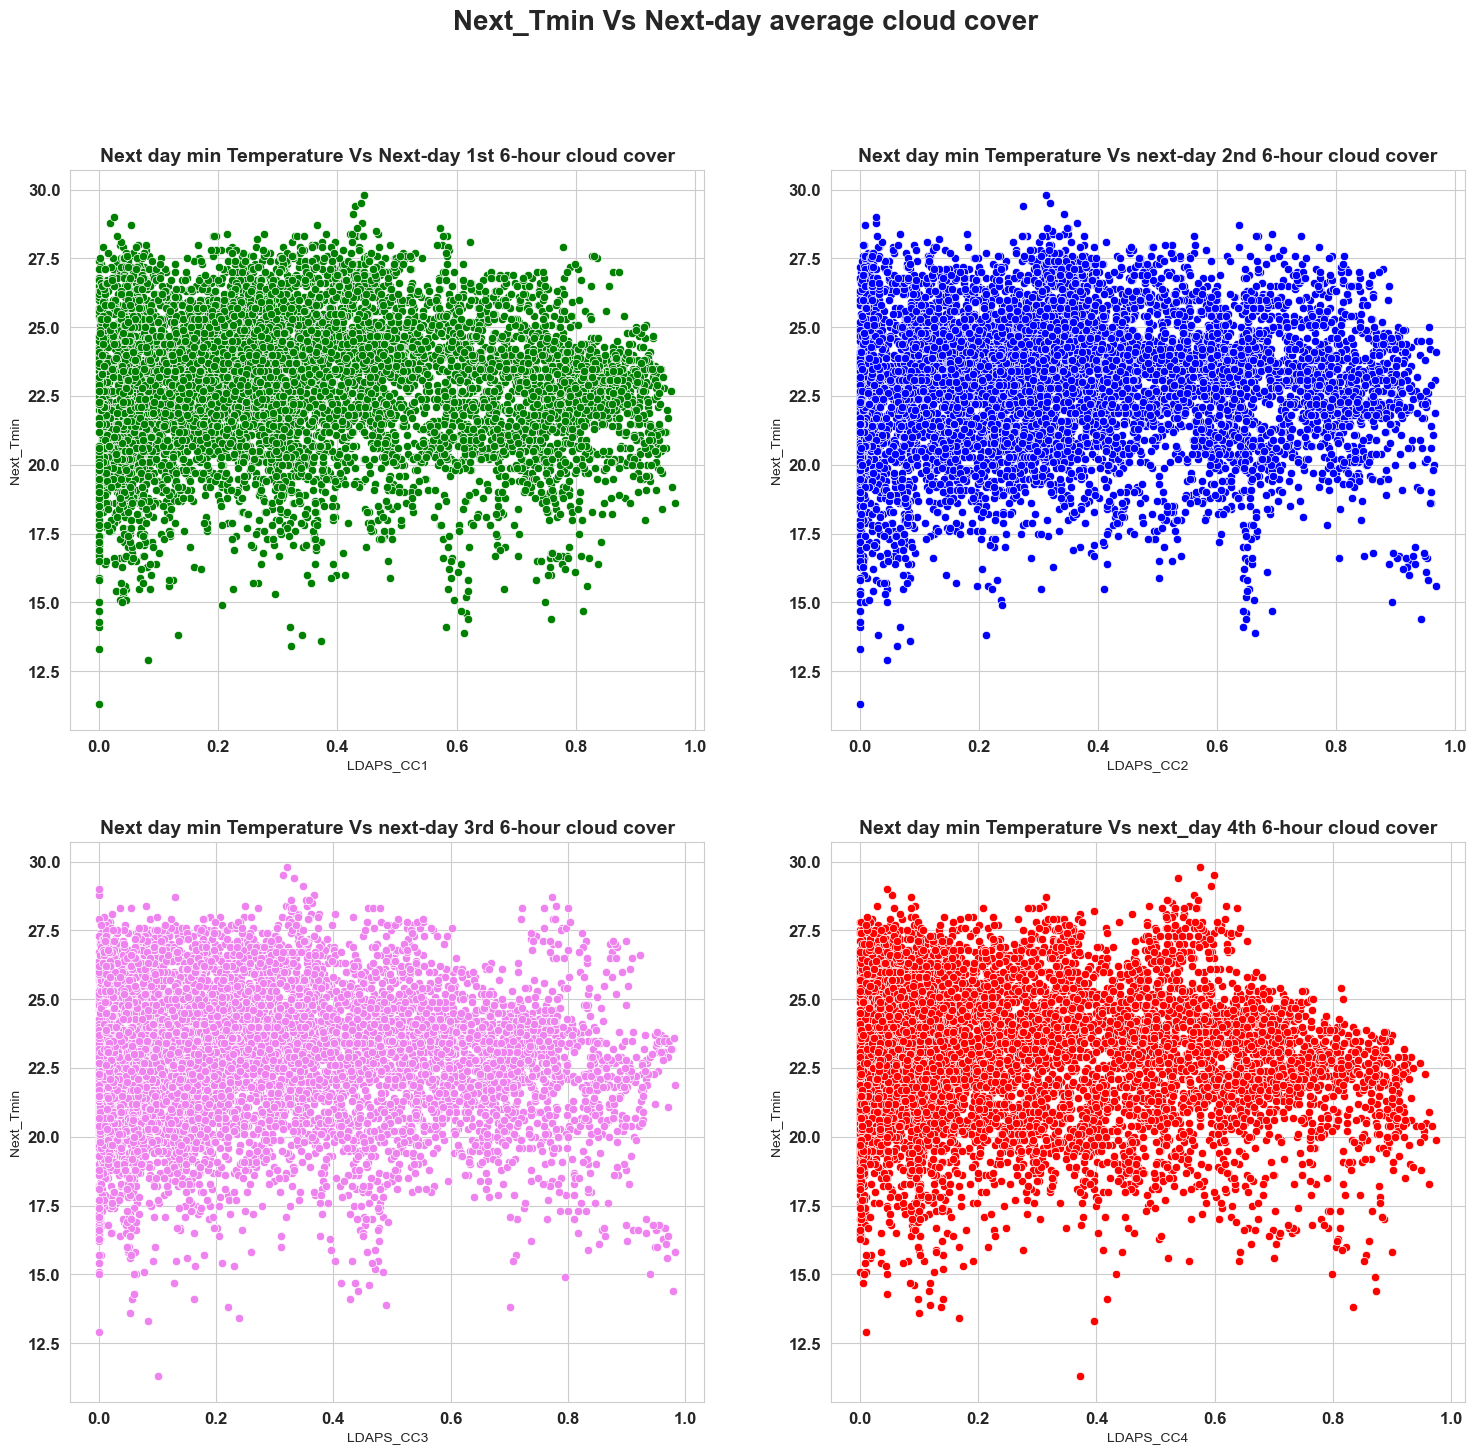

In [27]:
# Comparing Next day minimum temperature and next day average cloud cover

plt.figure(figsize=(18,16))
plt.suptitle('Next_Tmin Vs Next-day average cloud cover',fontsize=20, fontweight='bold')

plt.subplot(2,2,1)
plt.title('Next day min Temperature Vs Next-day 1st 6-hour cloud cover',fontsize=14, fontweight='bold')
sns.scatterplot(x='LDAPS_CC1',y='Next_Tmin',data=df,color="g")
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')

plt.subplot(2,2,2)
plt.title('Next day min Temperature Vs next-day 2nd 6-hour cloud cover',fontsize=14, fontweight='bold')
sns.scatterplot(x='LDAPS_CC2',y='Next_Tmin',data=df,color='b')
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')

plt.subplot(2,2,3)
plt.title('Next day min Temperature Vs next-day 3rd 6-hour cloud cover',fontsize=14, fontweight='bold')
sns.scatterplot(x='LDAPS_CC3',y='Next_Tmin',data=df,color='violet')
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')

plt.subplot(2,2,4)
plt.title('Next day min Temperature Vs next_day 4th 6-hour cloud cover',fontsize=14, fontweight='bold')
sns.scatterplot(x='LDAPS_CC4',y='Next_Tmin',data=df,color="r")
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')
plt.show()

**No significant relation between Next_Tmin and cloud cover in scatterplot.**

We can say that Next_Tmin remains unaffected by cloud cover.

**Solar radiation might most impact on cloud cover and precipitation, its time to explore them.**

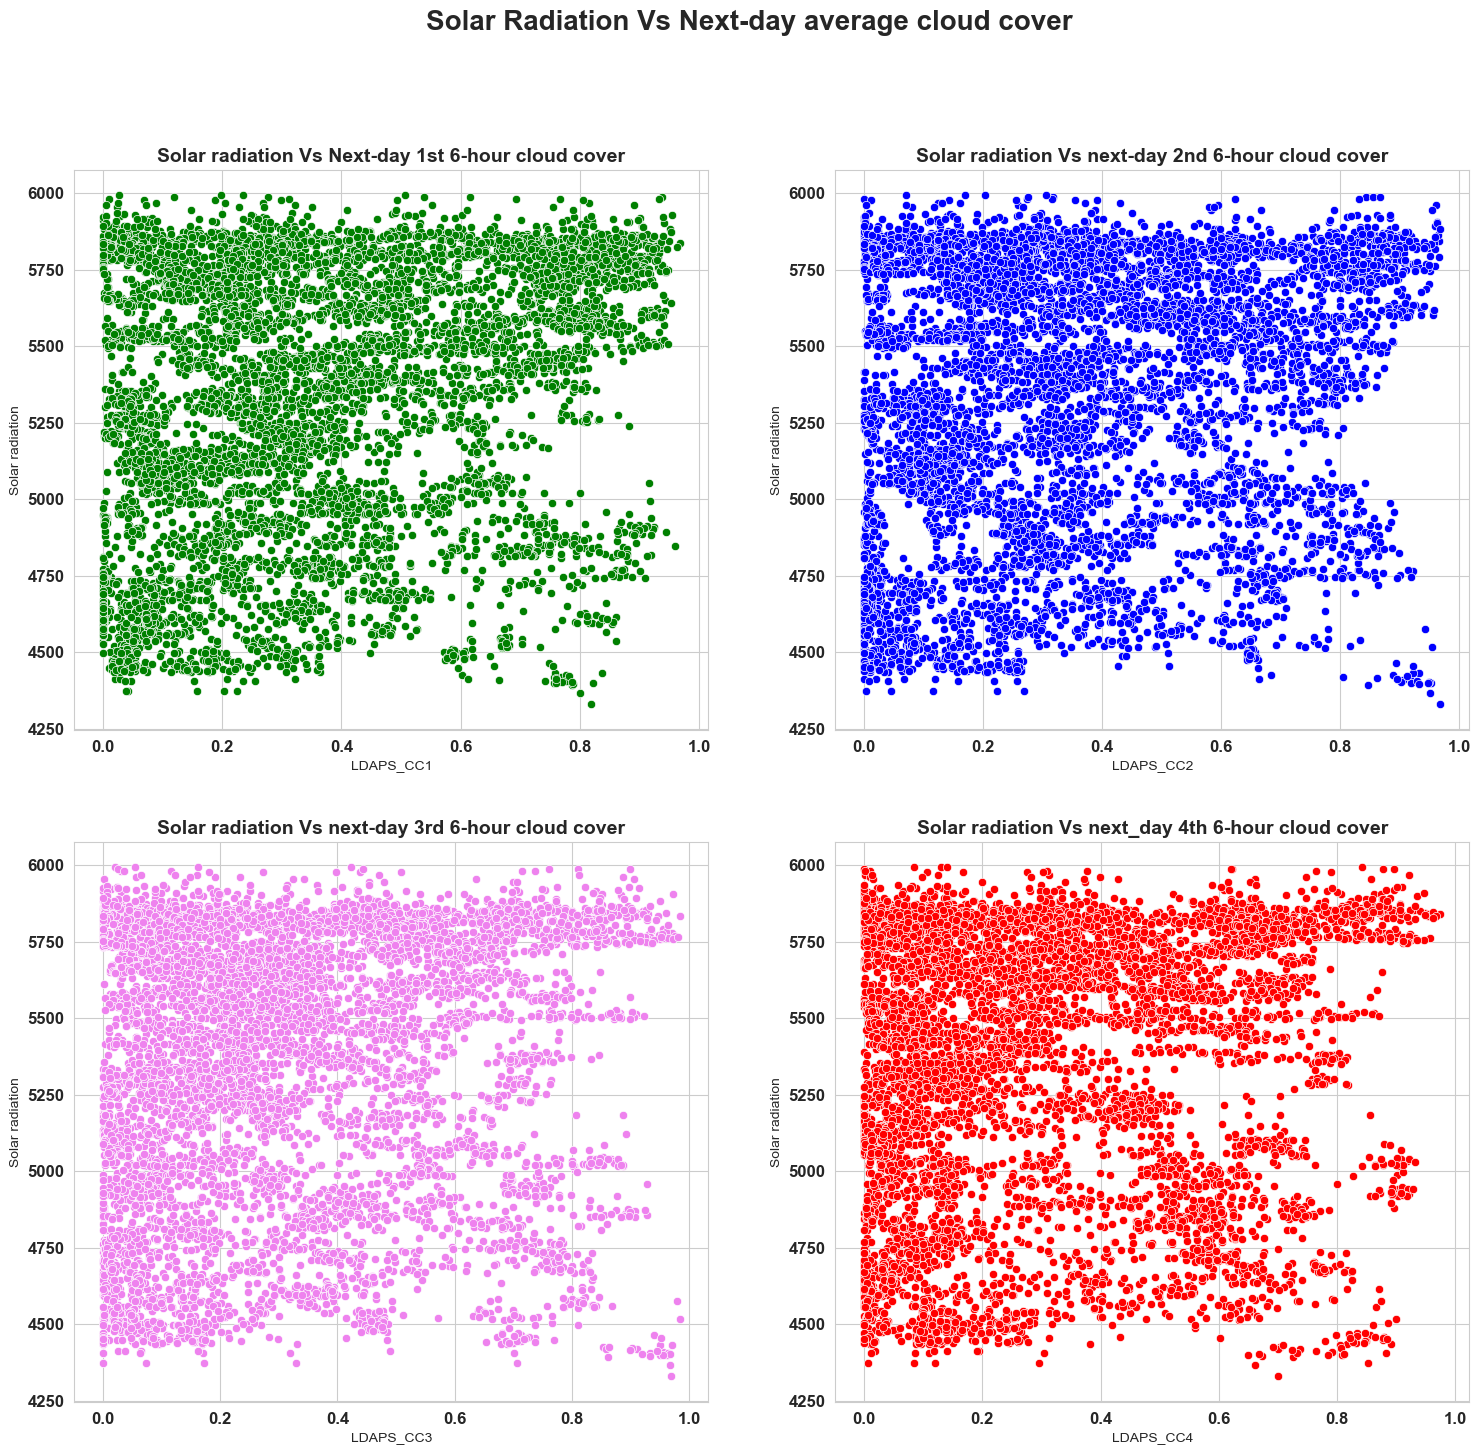

In [28]:
# Comparing Next day minimum temperature and next day average cloud cover

plt.figure(figsize=(18,16))
plt.suptitle('Solar Radiation Vs Next-day average cloud cover',fontsize=20, fontweight='bold')

plt.subplot(2,2,1)
plt.title('Solar radiation Vs Next-day 1st 6-hour cloud cover',fontsize=14, fontweight='bold')
sns.scatterplot(x='LDAPS_CC1',y='Solar radiation',data=df,color="g")
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')

plt.subplot(2,2,2)
plt.title('Solar radiation Vs next-day 2nd 6-hour cloud cover',fontsize=14, fontweight='bold')
sns.scatterplot(x='LDAPS_CC2',y='Solar radiation',data=df,color='b')
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')

plt.subplot(2,2,3)
plt.title('Solar radiation Vs next-day 3rd 6-hour cloud cover',fontsize=14, fontweight='bold')
sns.scatterplot(x='LDAPS_CC3',y='Solar radiation',data=df,color='violet')
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')

plt.subplot(2,2,4)
plt.title('Solar radiation Vs next_day 4th 6-hour cloud cover',fontsize=14, fontweight='bold')
sns.scatterplot(x='LDAPS_CC4',y='Solar radiation',data=df,color="r")
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')
plt.show()

- We can definitely say that for cloud greater than 0.7 high value solar radiation contribution most.

# Precipitation vs Solar radiation

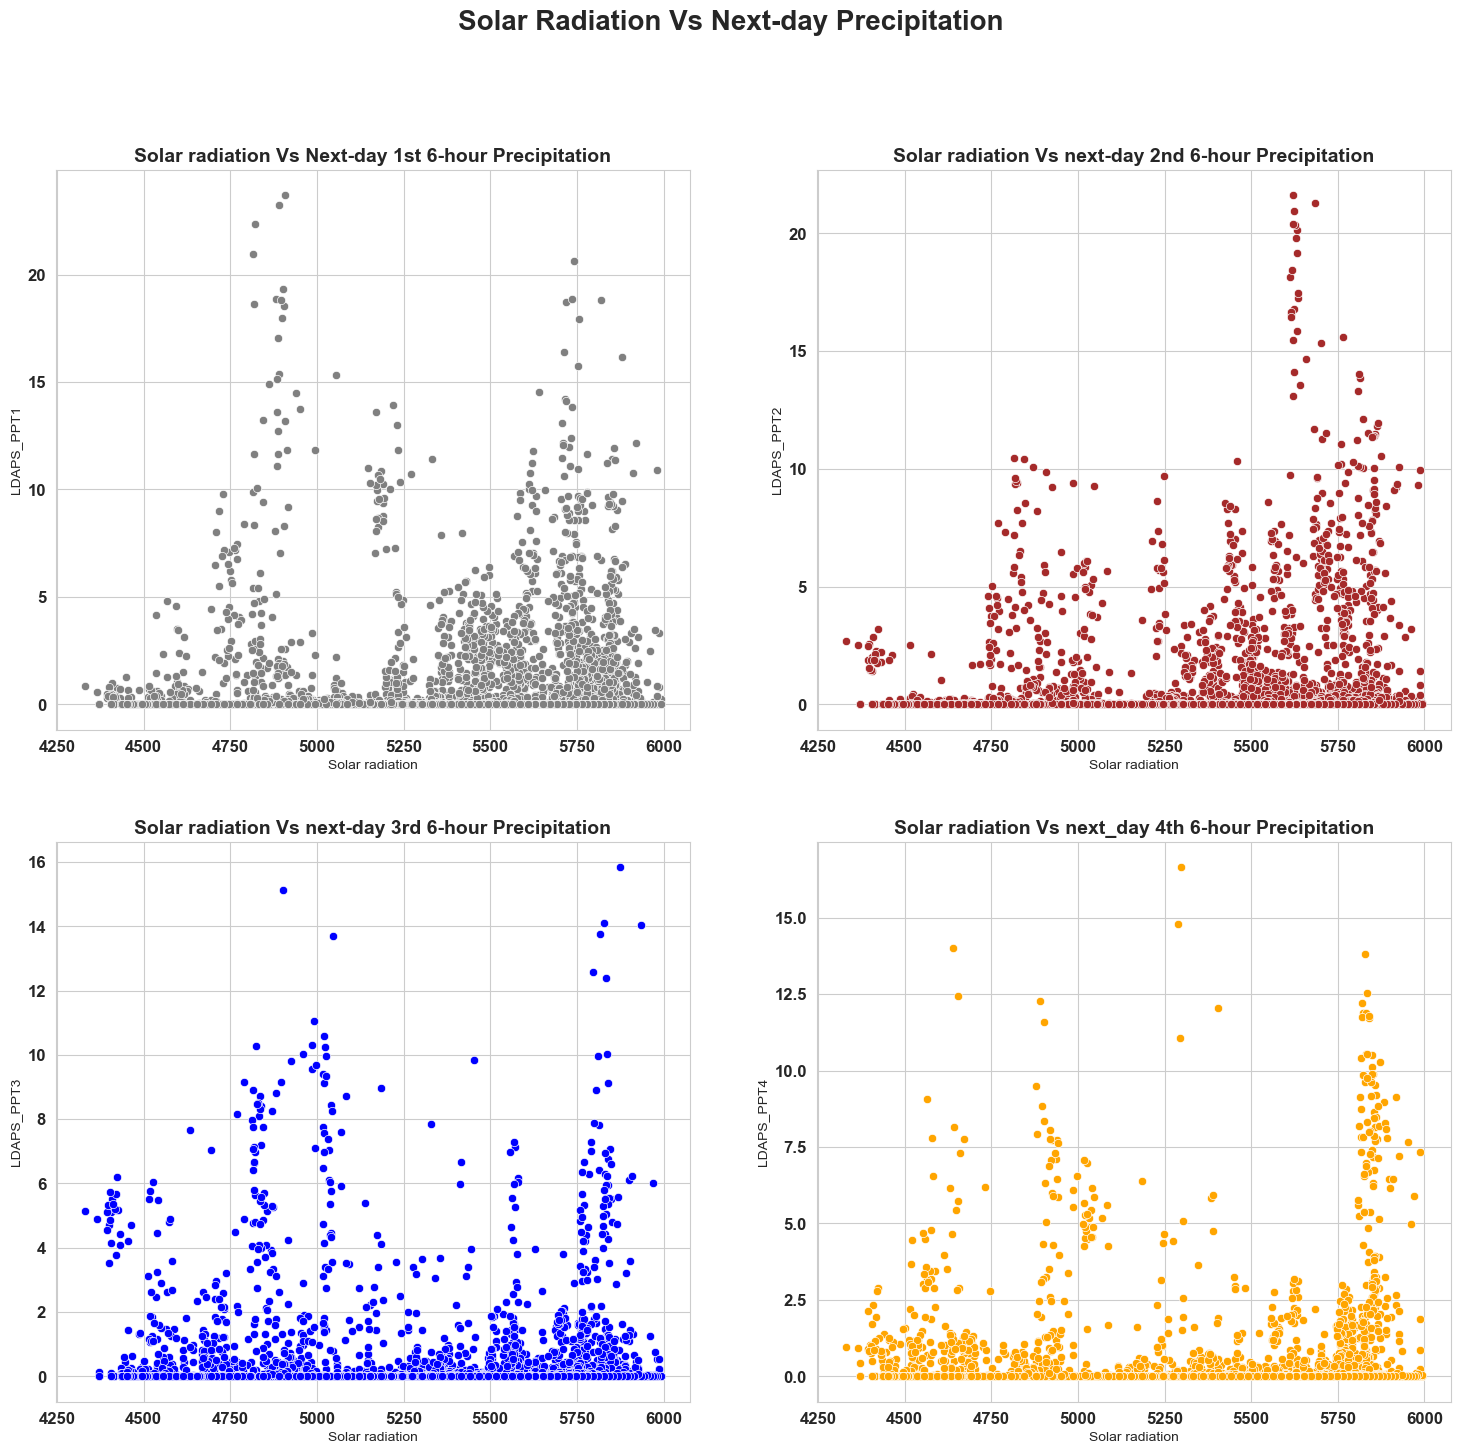

In [29]:
# Comparing Next day minimum temperature and next day average cloud cover

plt.figure(figsize=(18,16))
plt.suptitle('Solar Radiation Vs Next-day Precipitation',fontsize=20, fontweight='bold')

plt.subplot(2,2,1)
plt.title('Solar radiation Vs Next-day 1st 6-hour Precipitation',fontsize=14, fontweight='bold')
sns.scatterplot(y='LDAPS_PPT1',x='Solar radiation',data=df,color="grey")
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')

plt.subplot(2,2,2)
plt.title('Solar radiation Vs next-day 2nd 6-hour Precipitation',fontsize=14, fontweight='bold')
sns.scatterplot(y='LDAPS_PPT2',x='Solar radiation',data=df,color='brown')
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')

plt.subplot(2,2,3)
plt.title('Solar radiation Vs next-day 3rd 6-hour Precipitation',fontsize=14, fontweight='bold')
sns.scatterplot(y='LDAPS_PPT3',x='Solar radiation',data=df,color='blue')
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')

plt.subplot(2,2,4)
plt.title('Solar radiation Vs next_day 4th 6-hour Precipitation',fontsize=14, fontweight='bold')
sns.scatterplot(y='LDAPS_PPT4',x='Solar radiation',data=df,color="orange")
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')
plt.show()


**Observation:**
- Irrespective of to which 6hr quarter belong, solar radiation value greater than 5500w/m2 leads to higher amount of precipitation (normally greater than 8).
- If we consider scatterplot of solar radiation vs cloud along with above scatter plot, we can draw inference that for higher value of solar radiation cloud cover and precipitation followed each other. In other words higher precipitation means higher cloud over.

**This all give rise to few questions here:**
- Where relative humidity and wind speed fit in this equation of precipitation?
- Latent heat means heat absorption at constant temperature, there has to some effect of latent heat flux variation on relative humidity.
-  interesting thing to look forward is wind tend to blow clound. What is wind speed value in relative terms when cloud cover is high?
- What is variation in precipitation,cloud cover and wind speed over year period?
- Variation of temperature over duration of one year period?

**Lets start investigation from last question.**

<Axes: xlabel='Month', ylabel='LDAPS_PPT1'>

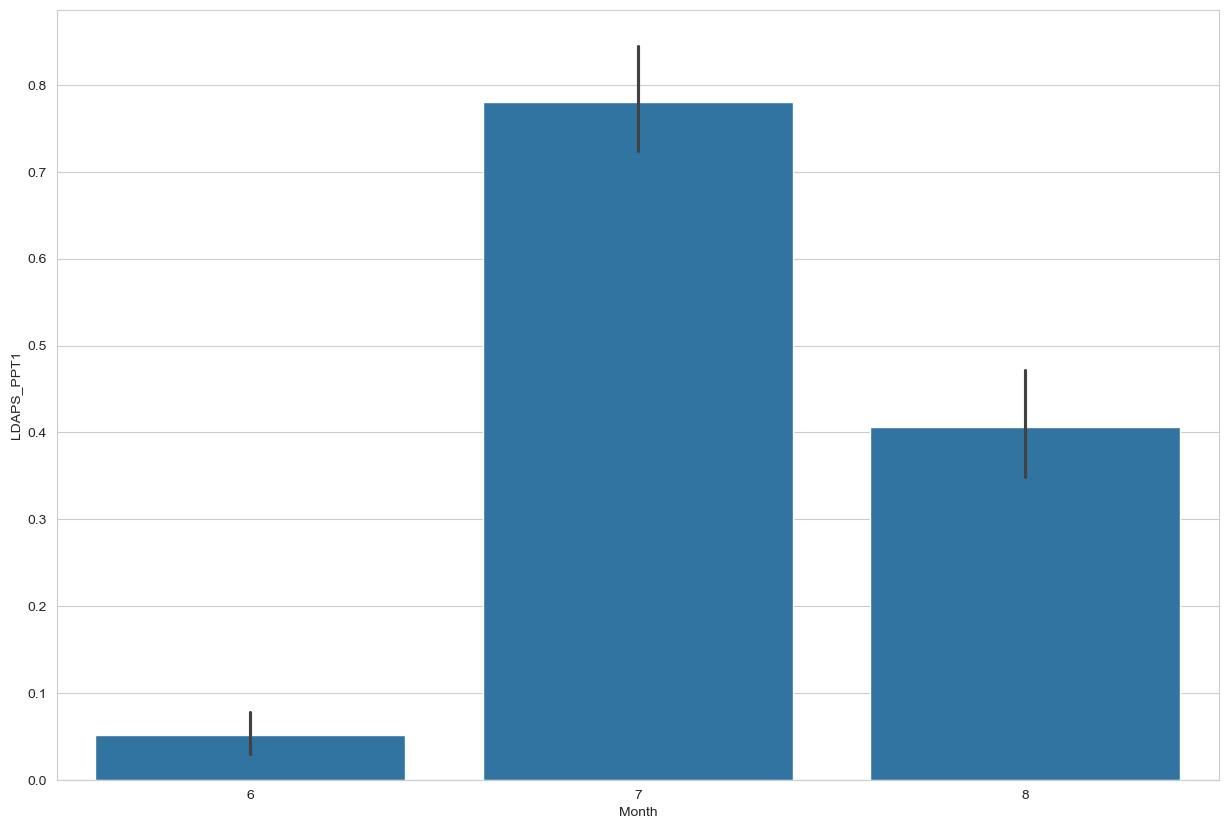

In [30]:
plt.figure(figsize=(15,10))
sns.barplot(x=df['Month'], y=df['LDAPS_PPT1'])

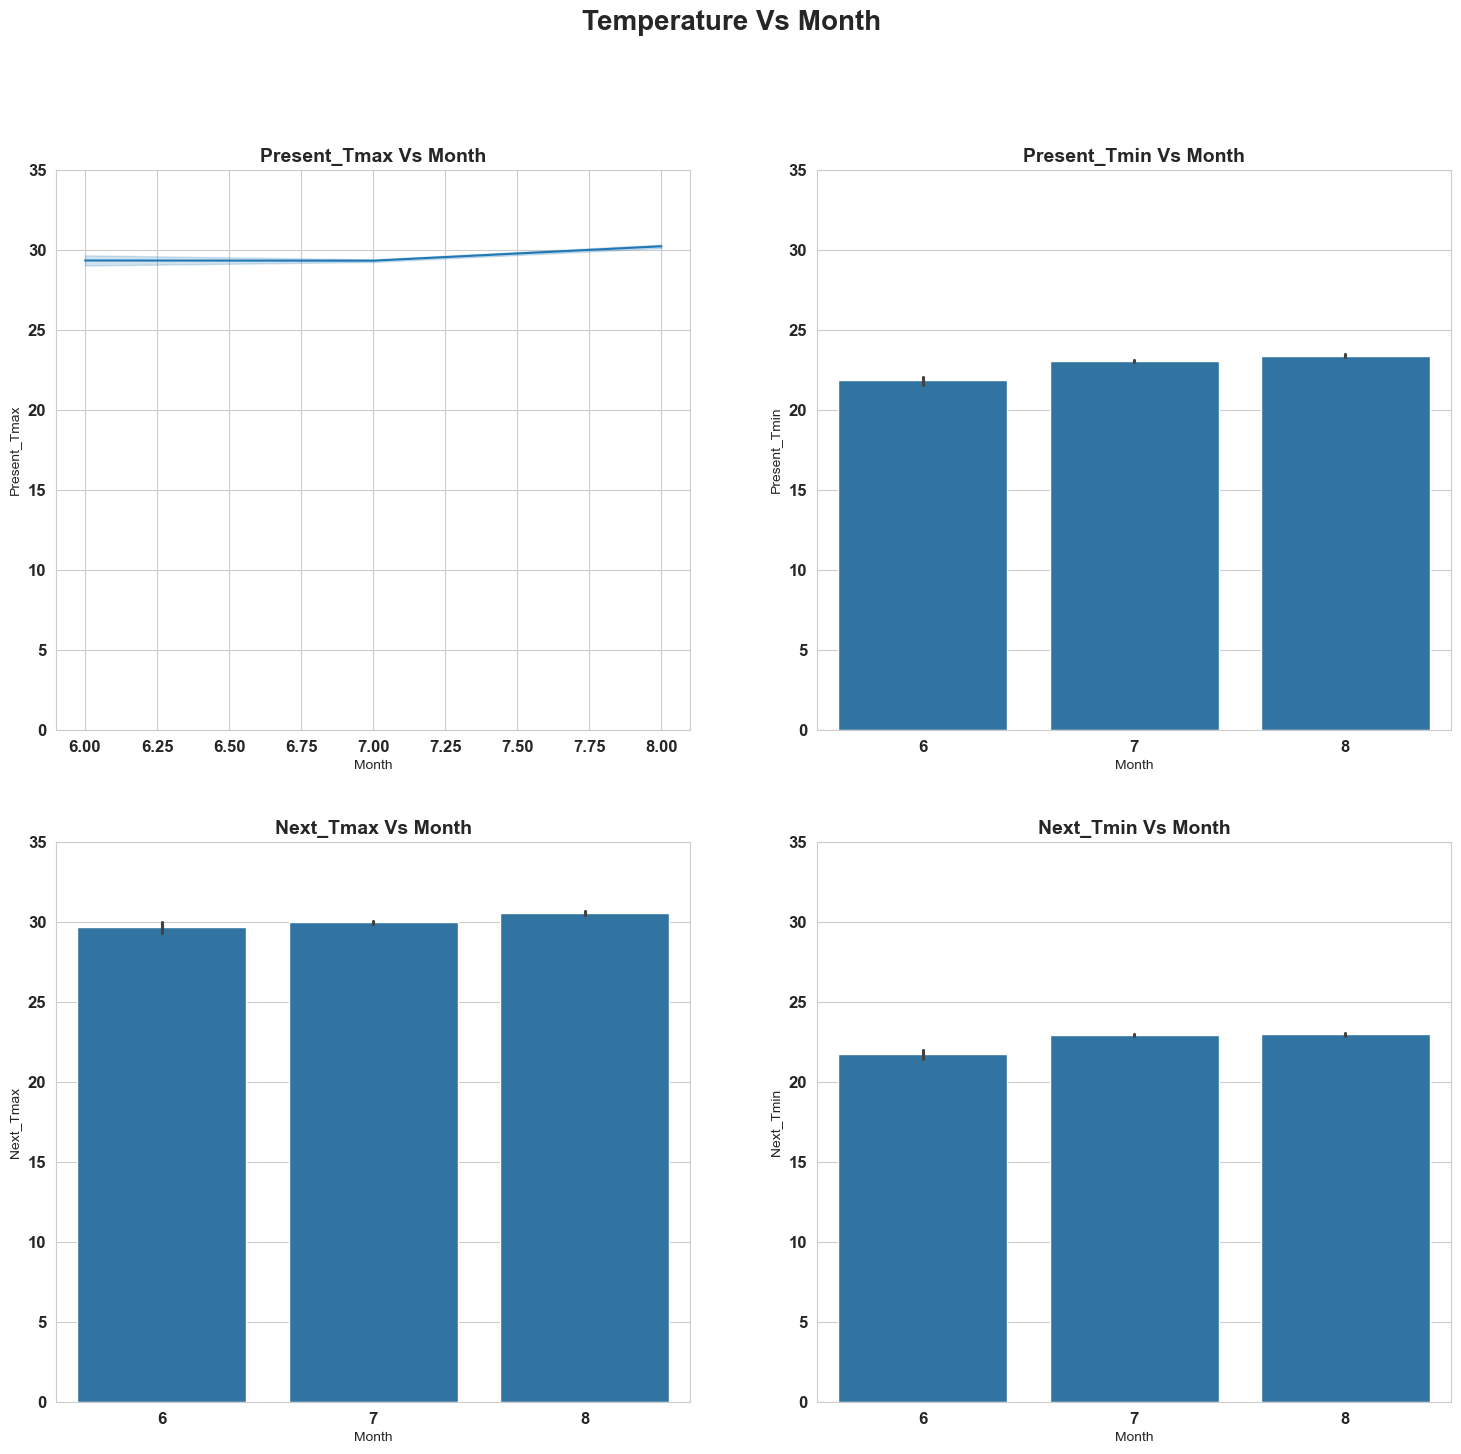

In [31]:
# Comparing Next day minimum temperature and next day average cloud cover

plt.figure(figsize=(18,16))
plt.suptitle('Temperature Vs Month',fontsize=20, fontweight='bold')

plt.subplot(2,2,1)
plt.title('Present_Tmax Vs Month',fontsize=14, fontweight='bold')
axes=sns.lineplot(y='Present_Tmax',x='Month',data=df)
axes.set_ylim([0, 35])
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')

plt.subplot(2,2,2)
plt.title('Present_Tmin Vs Month',fontsize=14, fontweight='bold')
axes=sns.barplot(y='Present_Tmin',x='Month',data=df)
axes.set_ylim([0, 35])
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')

plt.subplot(2,2,3)
plt.title('Next_Tmax Vs Month',fontsize=14, fontweight='bold')
axes=sns.barplot(y='Next_Tmax',x='Month',data=df)
axes.set_ylim([0, 35])
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')

plt.subplot(2,2,4)
plt.title('Next_Tmin Vs Month',fontsize=14, fontweight='bold')
axes=sns.barplot(y='Next_Tmin',x='Month',data=df)
axes.set_ylim([0, 35])
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')
plt.show()

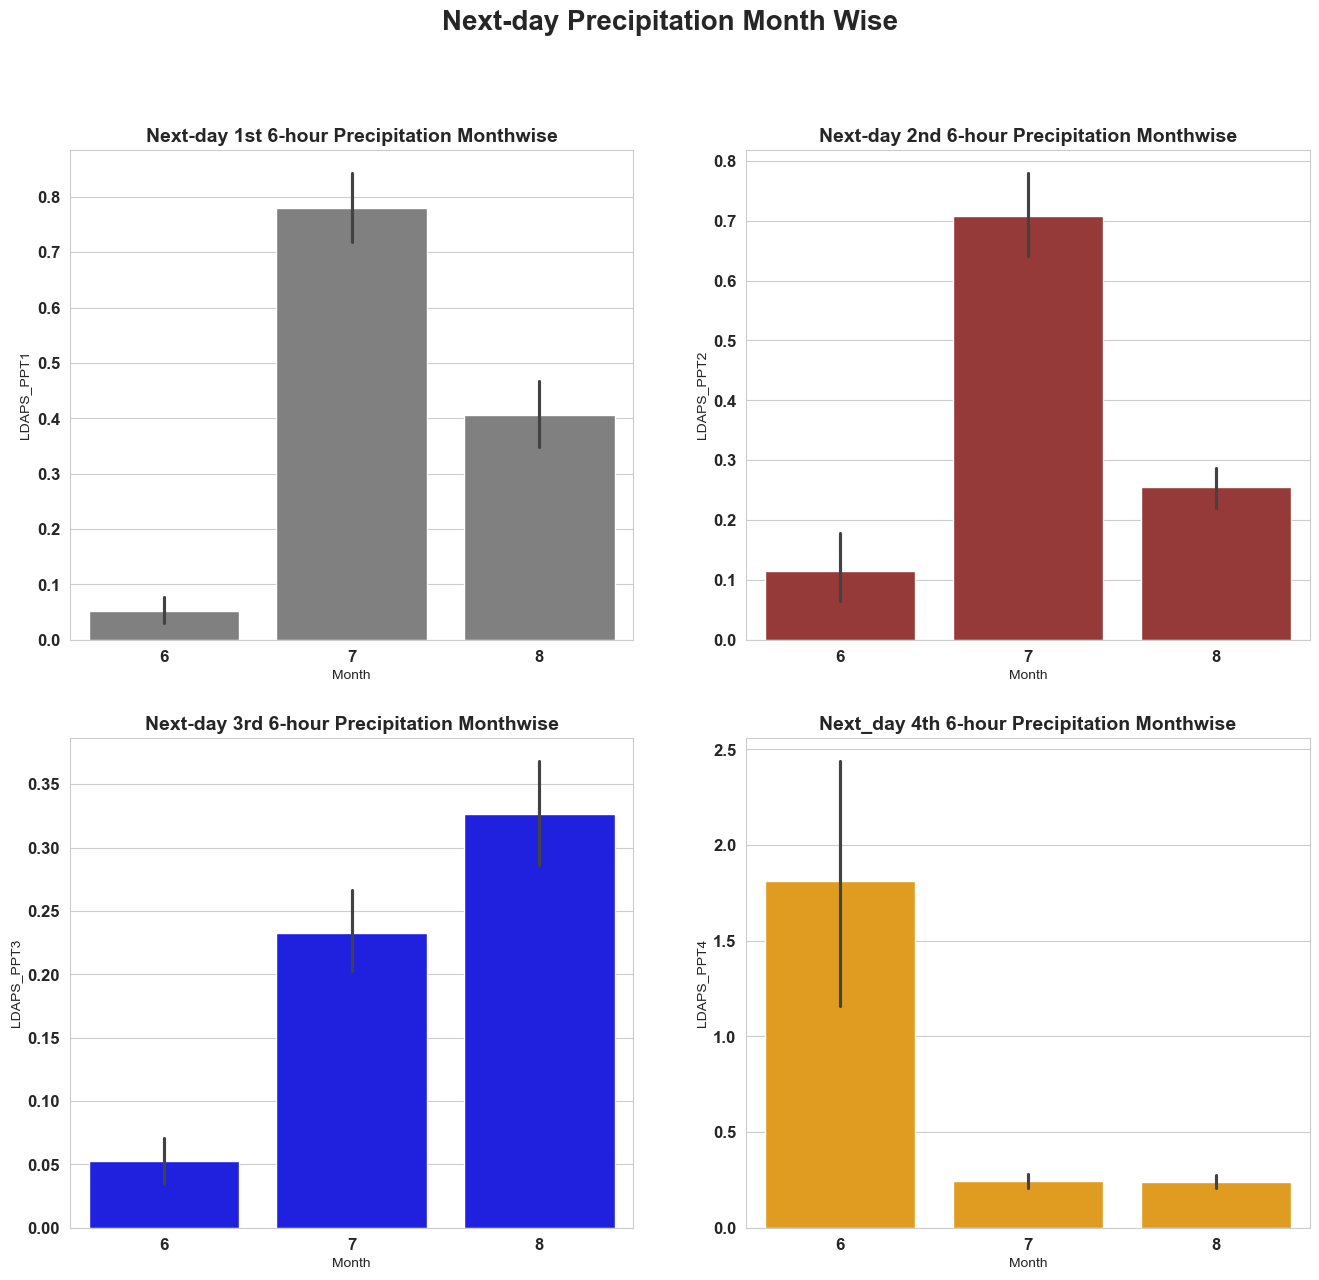

In [32]:
# Comparing Next day minimum temperature and next day average cloud cover

plt.figure(figsize=(16,14))
plt.suptitle('Next-day Precipitation Month Wise',fontsize=20, fontweight='bold')

plt.subplot(2,2,1)
plt.title('Next-day 1st 6-hour Precipitation Monthwise',fontsize=14, fontweight='bold')
sns.barplot(x=df['Month'], y=df['LDAPS_PPT1'],data=df,color="grey")
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')

plt.subplot(2,2,2)
plt.title('Next-day 2nd 6-hour Precipitation Monthwise',fontsize=14, fontweight='bold')
sns.barplot(x=df['Month'], y=df['LDAPS_PPT2'],data=df,color='brown')
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')

plt.subplot(2,2,3)
plt.title('Next-day 3rd 6-hour Precipitation Monthwise',fontsize=14, fontweight='bold')
sns.barplot(x=df['Month'], y=df['LDAPS_PPT3'],data=df,color='blue')
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')

plt.subplot(2,2,4)
plt.title('Next_day 4th 6-hour Precipitation Monthwise',fontsize=14, fontweight='bold')
sns.barplot(x=df['Month'], y=df['LDAPS_PPT4'],data=df,color="orange")
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')
plt.show()

Minimum Solar radiation : 4329.520508
Maximum Solar radiation : 5992.895996
Average Solar radiation : 5343.724207856747


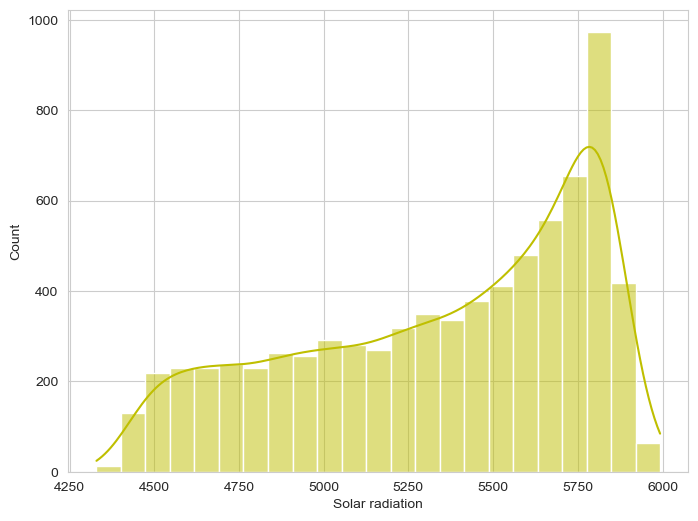

In [33]:
plt.figure(figsize=(8,6))
sns.histplot(df['Solar radiation'],kde=True,color='y')
print('Minimum Solar radiation :',df['Solar radiation'].min())
print('Maximum Solar radiation :',df['Solar radiation'].max())
print('Average Solar radiation :',df['Solar radiation'].mean())

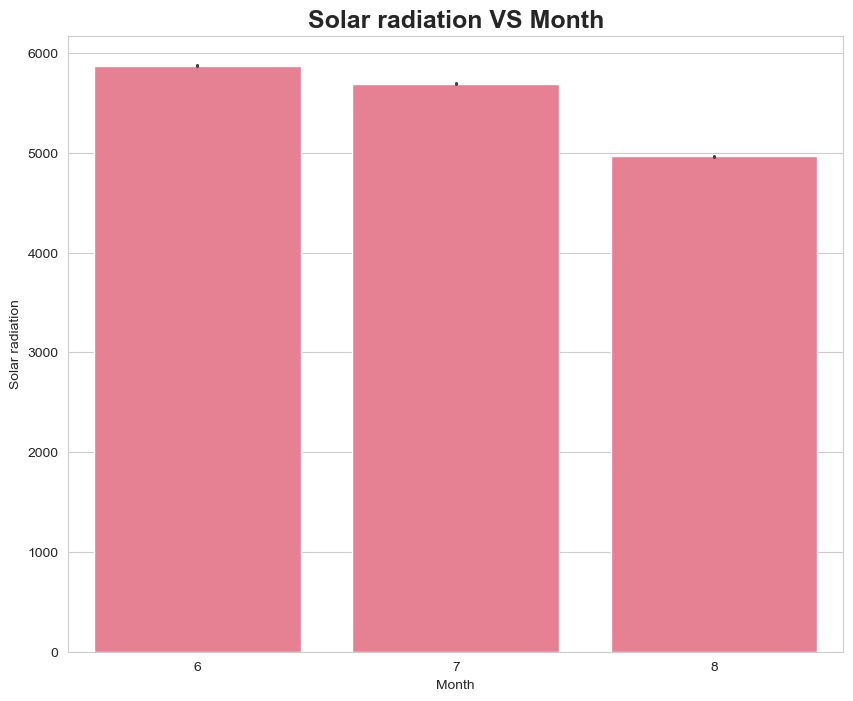

In [34]:
sns.set_palette('husl')
plt.figure(figsize=(10,8))
sns.barplot(y=df['Solar radiation'], x=df['Month'])
plt.title('Solar radiation VS Month',fontsize=18, fontweight='bold')
plt.show()

- Solar Radiation data is left skewed.
- It has its minimum value at 4329.52 Wh/m2 and maximum values at 5992.89 Wh/m2.
- For most of reading solar radiation values lies in the range 5600 to 5850.
- Minimum solar radiation occur in month of 8.

Minimum Wind Speed : 2.882579625 m/s
Maximum Wind Speed : 21.85762099 m/s
Average Wind Speed : 7.0940966991598575 m/s


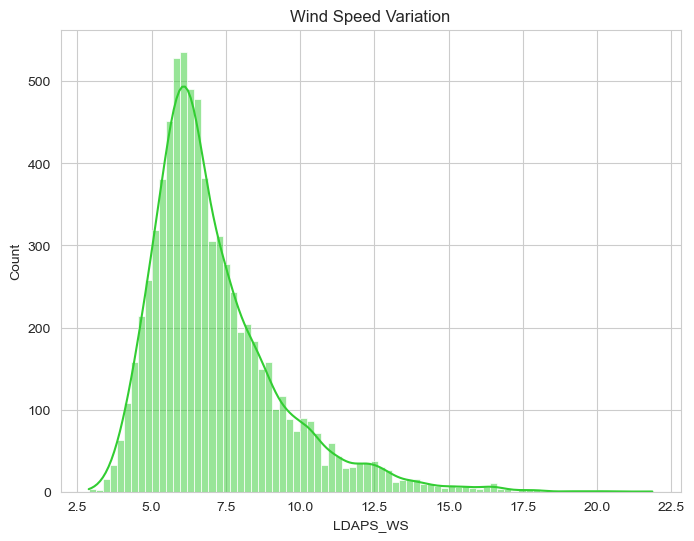

In [35]:
plt.figure(figsize=(8,6))
sns.histplot(df['LDAPS_WS'],kde=True,color='limegreen')
plt.title('Wind Speed Variation')
print('Minimum Wind Speed :',df['LDAPS_WS'].min(),'m/s')
print('Maximum Wind Speed :',df['LDAPS_WS'].max(),'m/s')
print('Average Wind Speed :',df['LDAPS_WS'].mean(),'m/s')

- It have its minimum value at 2.88m/s and maximum values at 21.85m/s.
- For most of reading values lies in the rabge 5m/s to 8m/s
- Graph is slighly right skewed

Minimum RHmax is 58.93628311 % and Maximum RHmax is 100.0001526 %
Minimum RHmin is 19.79466629 % and Maximum RHmin is 98.5247345 %


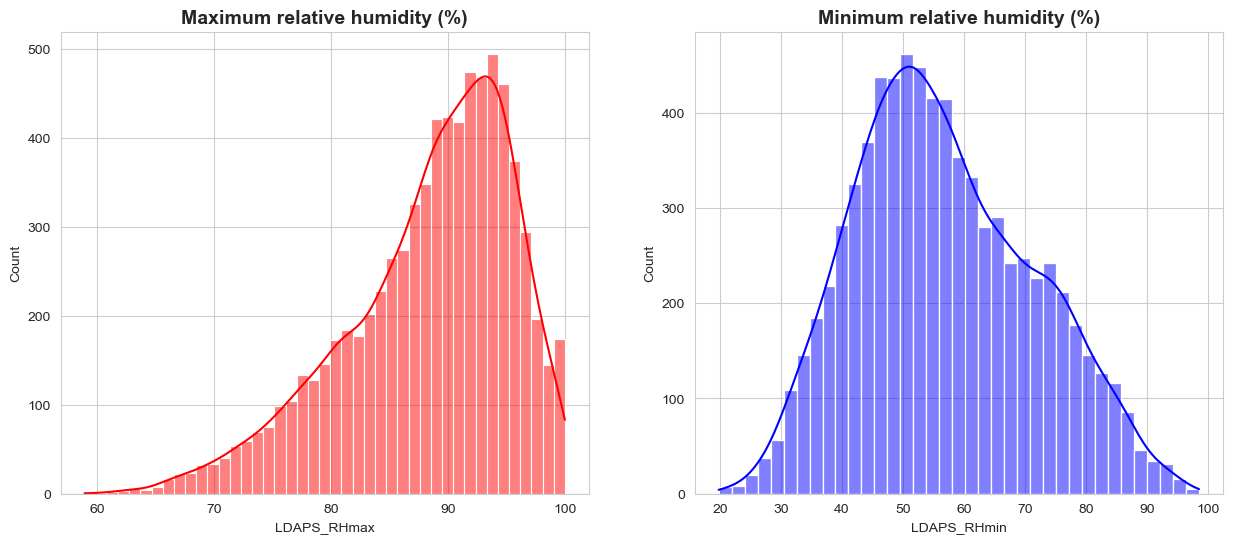

In [36]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.histplot(df['LDAPS_RHmax'],kde=True,color='r')
plt.title('Maximum relative humidity (%)',fontsize=14, fontweight='bold')
plt.subplot(1,2,2)
sns.histplot(df['LDAPS_RHmin'],kde=True,color='b')
plt.title('Minimum relative humidity (%)',fontsize=14, fontweight='bold')
print('Minimum RHmax is {} % and Maximum RHmax is {} %'.format(df['LDAPS_RHmax'].min(),df['LDAPS_RHmax'].max()))
print('Minimum RHmin is {} % and Maximum RHmin is {} %'.format(df['LDAPS_RHmin'].min(),df['LDAPS_RHmin'].max()))

- Data of Maximum relative humidity is left skewed and data of minimum relative humidity is slighly right skewed.
- Maximum relative humidity for most of the days lie in the range 90 to 97.
- Maximum relative humidity lies in the range 45 to 62.

Minimum Tmax applied lapse rate is 17.62495378 (Â°C) and Maximum Tmax applied lapse rate is 38.54225522 (Â°C)
Minimum Tmin is applied lapse rate 14.27264631 (Â°C) and Maximum Tmin applied lapse rate is 29.61934244 (Â°C)


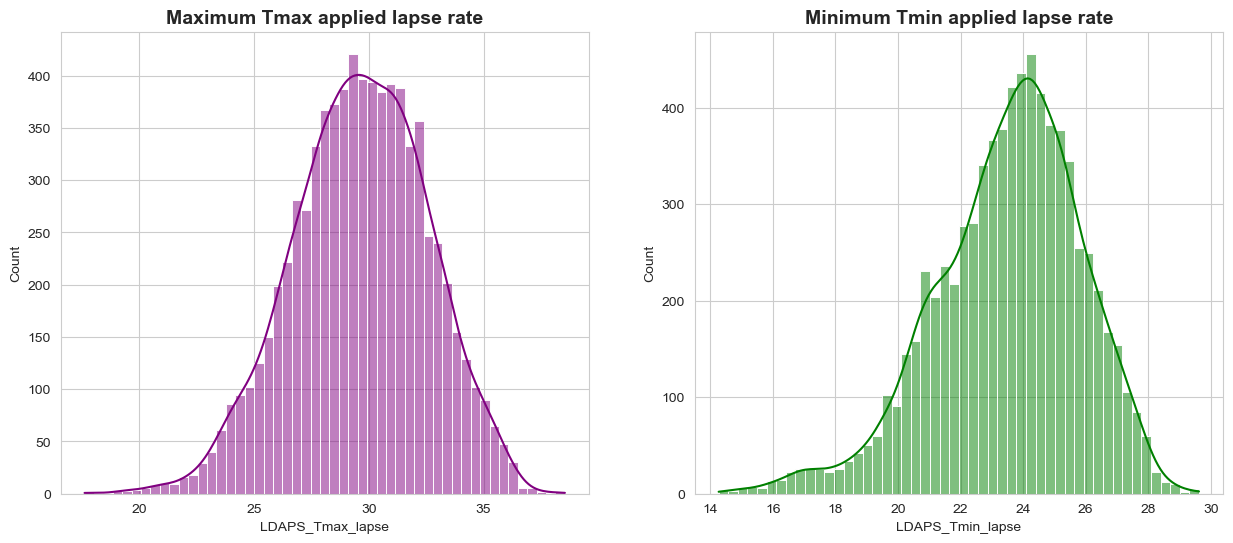

In [37]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.histplot(df['LDAPS_Tmax_lapse'],kde=True,color='purple')
plt.title('Maximum Tmax applied lapse rate',fontsize=14, fontweight='bold')
plt.subplot(1,2,2)
sns.histplot(df['LDAPS_Tmin_lapse'],kde=True,color='green')
plt.title('Minimum Tmin applied lapse rate',fontsize=14, fontweight='bold')
print('Minimum Tmax applied lapse rate is {} (Â°C) and Maximum Tmax applied lapse rate is {} (Â°C)'.format(df['LDAPS_Tmax_lapse'].min(),df['LDAPS_Tmax_lapse'].max()))
print('Minimum Tmin is applied lapse rate {} (Â°C) and Maximum Tmin applied lapse rate is {} (Â°C)'.format(df['LDAPS_Tmin_lapse'].min(),df['LDAPS_Tmin_lapse'].max()))

- Tmax and Tmin for applied lapse rate are almost normally distributed.
- Tmax_lapse for majority of days its values lies in the range 27 to 33.
- Tmin_lapse for majority of days its values lies in the range 23 to 26.

Minimum Latent Heat Flux : -13.60321209
Maximum Latent Heat Flux : 213.4140062
Average Latent Heat Flux : 62.492606287988


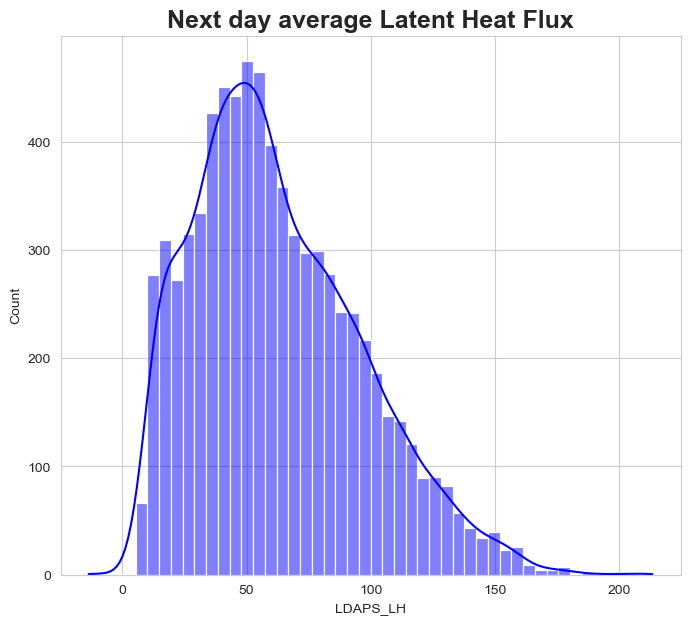

In [38]:
plt.figure(figsize=(8,7))
sns.histplot(df['LDAPS_LH'],kde=True,color='blue')
plt.title('Next day average Latent Heat Flux',fontsize=18, fontweight='bold')
print('Minimum Latent Heat Flux :',df['LDAPS_LH'].min())
print('Maximum Latent Heat Flux :',df['LDAPS_LH'].max())
print('Average Latent Heat Flux :',df['LDAPS_LH'].mean())

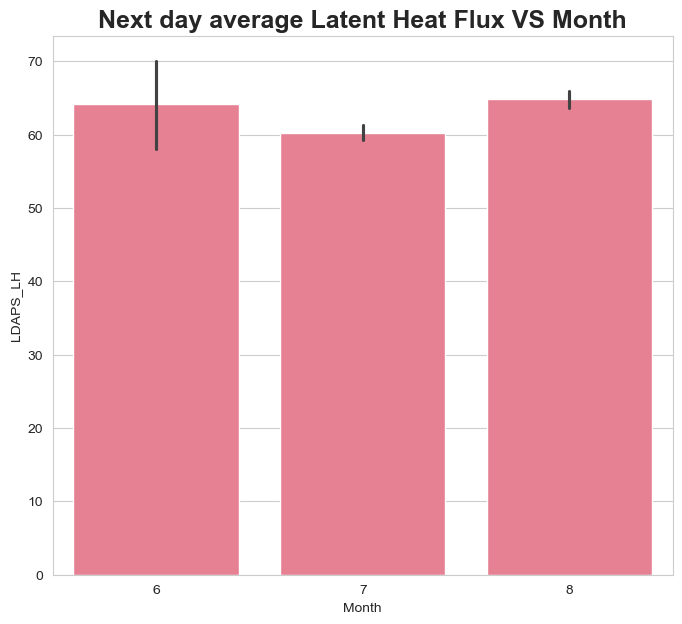

In [39]:
plt.figure(figsize=(8,7))
sns.barplot(y=df['LDAPS_LH'], x=df['Month'])
plt.title('Next day average Latent Heat Flux VS Month',fontsize=18, fontweight='bold')
plt.show()

**Minimum Latent Heat Flux observe in month of July.**

# Encoding categorical data

In [40]:
# Sort columns by datatypes
df.columns.to_series().groupby(df.dtypes).groups

{float64: ['station', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin', 'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4', 'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon', 'DEM', 'Slope', 'Solar radiation', 'Next_Tmax', 'Next_Tmin'], datetime64[ns]: ['Date'], int64: ['Day', 'Month', 'Year'], object: ['State', 'City']}

In [41]:
# Using Label Encoder on categorical variable

Category = ['State', 'City']
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in Category:
    df[i] = le.fit_transform(df[i])
    
df.head()

station       Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0      1.0 2013-06-30          28.7          21.4    58.255688    91.116364   
1      2.0 2013-06-30          31.9          21.6    52.263397    90.604721   
2      3.0 2013-06-30          31.6          23.3    48.690479    83.973587   
3      4.0 2013-06-30          32.0          23.4    58.239788    96.483688   
4      5.0 2013-06-30          31.4          21.9    56.174095    90.155128   

   LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  LDAPS_CC1  \
0         28.074101         23.006936  6.818887   69.451805   0.233947   
1         29.850689         24.035009  5.691890   51.937448   0.225508   
2         30.091292         24.565633  6.138224   20.573050   0.209344   
3         29.704629         23.326177  5.650050   65.727144   0.216372   
4         29.113934         23.486480  5.735004  107.965535   0.151407   

   LDAPS_CC2  LDAPS_CC3  LDAPS_CC4  LDAPS_PPT1  LDAPS_PPT2  LDAPS_PPT3  \
0   0.203896   0.161697   0.130928         0.0         0.0         0.0   
1   0.251771   0.159444   0.127727         0.0         0.0         0.0   
2   0.257469   0.204091   0.142125         0.0         0.0         0.0   
3   0.226002   0.161157   0.134249         0.0         0.0         0.0   
4   0.249995   0.178892   0.170021         0.0         0.0         0.0   

   LDAPS_PPT4      lat      lon       DEM   Slope  Solar radiation  Next_Tmax  \
0         0.0  37.6046  126.991  212.3350  2.7850      5992.895996       29.1   
1         0.0  37.6046  127.032   44.7624  0.5141      5869.312500       30.5   
2         0.0  37.5776  127.058   33.3068  0.2661      5863.555664       31.1   
3         0.0  37.6450  127.022   45.7160  2.5348      5856.964844       31.7   
4         0.0  37.5507  127.135   35.0380  0.5055      5859.552246       31.2   

   Next_Tmin  Day  Month  Year  State  City  
0       21.2   30      6  2013      1     6  
1       22.5   30      6  2013      1     6  
2       23.9   30      6  2013      1     6  
3       24.3   30      6  2013      1     6  
4       22.5   30      6  2013      0     3

In [42]:
# Droping unnecessary columns
df.drop(['Date'], axis=1, inplace=True)

# Feature selection and Engineering

**1. Outliers Detection and Removal**

In [43]:
df.shape

(7588, 29)

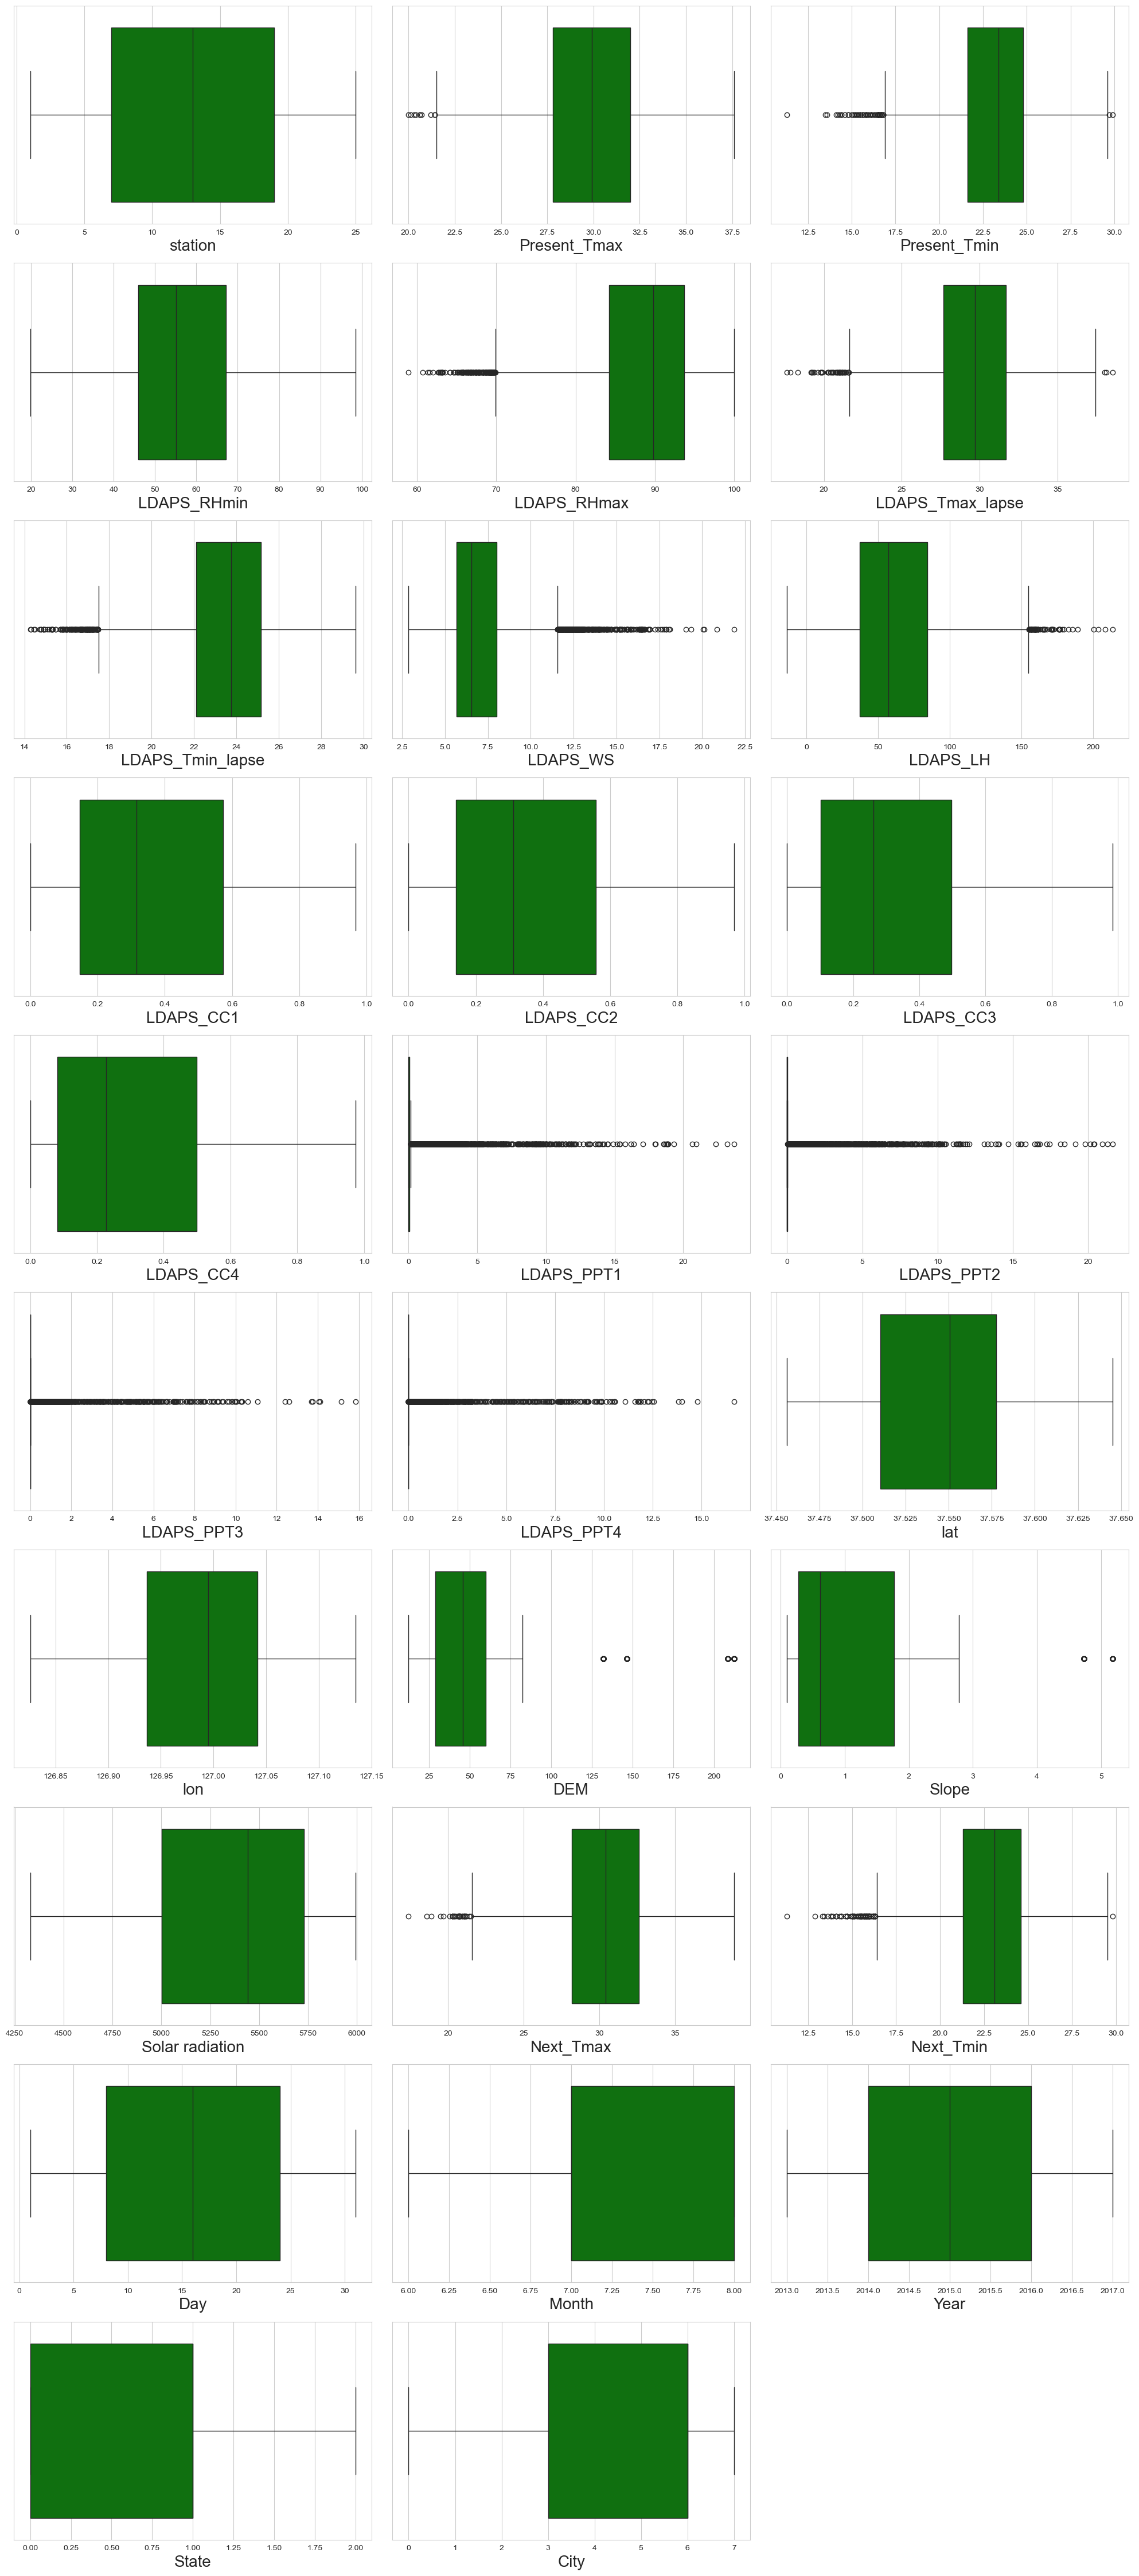

In [44]:
plt.figure(figsize=(20,45),facecolor='white')
plotnumber=1

for column in df:
    if plotnumber<=29:
        ax=plt.subplot(10,3,plotnumber)
        sns.boxplot(x=df[column],color='g')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()
plt.show()

**From Boxplot we can see outliers exist dataset.**

**Outliers removal using Zscore method**

In [45]:
from scipy.stats import zscore
z = np.abs(zscore(df))
threshold = 3
df1 = df[(z<3).all(axis = 1)]

print ("Shape of the dataframe before removing outliers: ", df.shape)
print ("Shape of the dataframe after removing outliers: ", df1.shape)
print ("Percentage of data loss post outlier removal: ", (df.shape[0]-df1.shape[0])/df.shape[0]*100)

df=df1.copy() # reassigning the changed dataframe name to our original dataframe name

Shape of the dataframe before removing outliers:  (7588, 29)
Shape of the dataframe after removing outliers:  (6739, 29)
Percentage of data loss post outlier removal:  11.188719030047443


We are losing 11.18% of data. Its big but we can afford it. Considering we have a lot rows in our dataset for ML model building.

**2. Skewness of features**

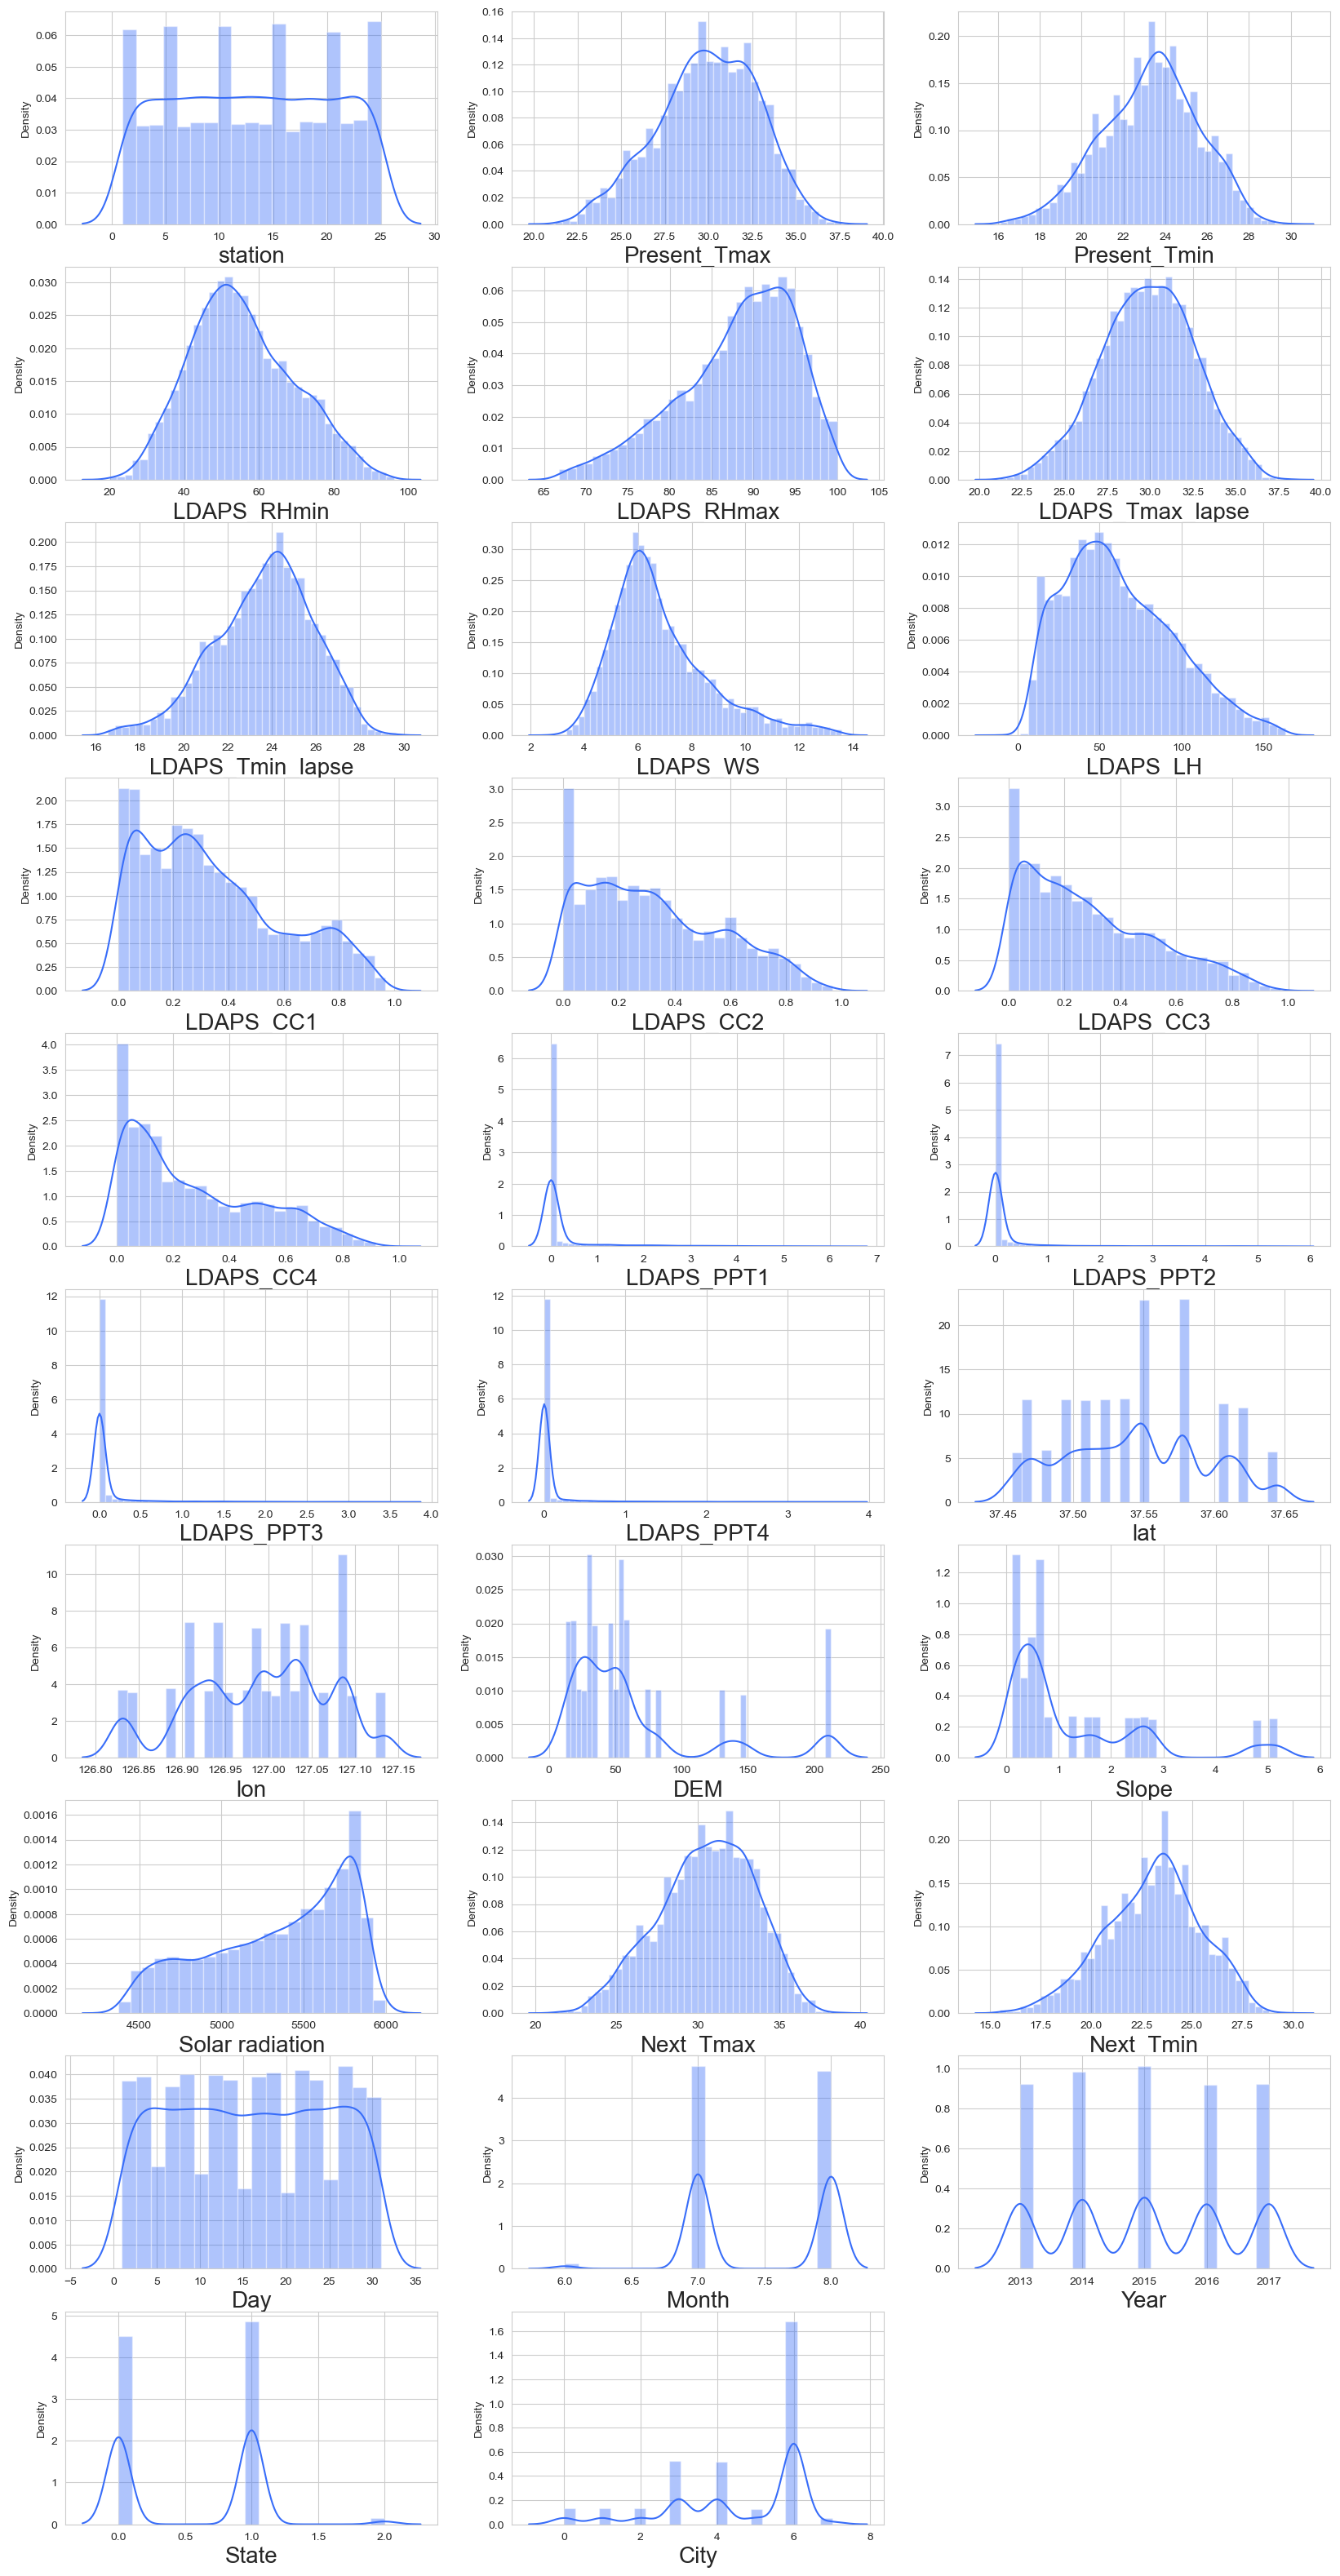

In [46]:
plt.figure(figsize=(20,40),facecolor='white')
sns.set_palette('rainbow')
plotnum=1
for col in df:
    if plotnum<=29:
        plt.subplot(10,3,plotnum)
        sns.distplot(df[col])
        plt.xlabel(col,fontsize=20)
    plotnum+=1
plt.show()

**Skewness is important feature for continous data. There is no relevance of skewness for discrete numerical feature like month and categorical feature. So we gone ignore skewness present in discrete numerical and categorical feature.**

**We also going to ignore skewness in target feature.**

In [47]:
df.skew()

station            -0.001594
Present_Tmax       -0.269936
Present_Tmin       -0.221250
LDAPS_RHmin         0.309567
LDAPS_RHmax        -0.686083
LDAPS_Tmax_lapse   -0.110563
LDAPS_Tmin_lapse   -0.379269
LDAPS_WS            1.085685
LDAPS_LH            0.567050
LDAPS_CC1           0.594835
LDAPS_CC2           0.505774
LDAPS_CC3           0.701288
LDAPS_CC4           0.708754
LDAPS_PPT1          3.724580
LDAPS_PPT2          4.854967
LDAPS_PPT3          5.516862
LDAPS_PPT4          5.924324
lat                 0.106983
lon                -0.277547
DEM                 1.764698
Slope               1.590130
Solar radiation    -0.520157
Next_Tmax          -0.267526
Next_Tmin          -0.234328
Day                 0.000057
Month              -0.168571
Year                0.025066
State               0.143188
City               -0.951530
dtype: float64

**Here some are positively skewed while others are negatively skewed. We gone use yeo-johnson method for transfromation.**

In [48]:
# Making the skew less than or equal to +0.5 and -0.5 for better prediction using yeo-johnson method
skew=['LDAPS_RHmax','LDAPS_Tmin_lapse','LDAPS_WS','LDAPS_LH','LDAPS_CC3','LDAPS_CC4',
      'LDAPS_PPT1','LDAPS_PPT2','LDAPS_PPT3','LDAPS_PPT4','DEM','Slope','Solar radiation','Month']

# Importing Powertransformer
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')

# Transfroming skew data
df[skew] = scaler.fit_transform(df[skew].values)

**For LDAPS_PPT1, LDAPS_PPT", LDAPS_PPT3 and LDAPS_PPT4 skewness has not been removed but it got reduced.**

**3. Corrleation**

In [49]:
df.corr()

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  \
station           1.000000      0.110291      0.133638    -0.069582   
Present_Tmax      0.110291      1.000000      0.610428    -0.154266   
Present_Tmin      0.133638      0.610428      1.000000     0.151385   
LDAPS_RHmin      -0.069582     -0.154266      0.151385     1.000000   
LDAPS_RHmax      -0.182354     -0.320074     -0.053421     0.566069   
LDAPS_Tmax_lapse  0.066863      0.540680      0.441577    -0.555583   
LDAPS_Tmin_lapse  0.108664      0.623443      0.764041     0.114069   
LDAPS_WS          0.030231     -0.071596      0.034364     0.171684   
LDAPS_LH         -0.135717      0.119022     -0.008556    -0.002412   
LDAPS_CC1         0.008671     -0.290078      0.090828     0.574389   
LDAPS_CC2         0.006380     -0.157917      0.117894     0.713238   
LDAPS_CC3         0.006303     -0.061417      0.043629     0.636195   
LDAPS_CC4         0.011510     -0.049978      0.000193     0.459528   
LDAPS_PPT1       -0.001774     -0.190222      0.068506     0.410985   
LDAPS_PPT2       -0.006798     -0.097425      0.090113     0.510241   
LDAPS_PPT3       -0.004884     -0.022348      0.035889     0.405612   
LDAPS_PPT4       -0.000285     -0.021344     -0.063495     0.244139   
lat              -0.241811     -0.052041     -0.072707     0.090054   
lon              -0.122829      0.011132     -0.043201    -0.093969   
DEM              -0.326019     -0.130892     -0.238916     0.057460   
Slope            -0.146034     -0.092409     -0.157839     0.083910   
Solar radiation  -0.034787     -0.099696     -0.047145     0.229070   
Next_Tmax         0.106378      0.586943      0.438813    -0.433872   
Next_Tmin         0.129110      0.615950      0.785946     0.134518   
Day               0.005032     -0.130708     -0.082712    -0.073118   
Month             0.011309      0.171614      0.104576    -0.183976   
Year              0.006658      0.099185      0.099222     0.001709   
State            -0.107709     -0.049572     -0.073556    -0.078498   
City             -0.172313     -0.028619     -0.032508    -0.060087   

                  LDAPS_RHmax  LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS  \
station             -0.182354          0.066863          0.108664  0.030231   
Present_Tmax        -0.320074          0.540680          0.623443 -0.071596   
Present_Tmin        -0.053421          0.441577          0.764041  0.034364   
LDAPS_RHmin          0.566069         -0.555583          0.114069  0.171684   
LDAPS_RHmax          1.000000         -0.403634         -0.182113  0.060965   
LDAPS_Tmax_lapse    -0.403634          1.000000          0.624572 -0.154400   
LDAPS_Tmin_lapse    -0.182113          0.624572          1.000000 -0.002164   
LDAPS_WS             0.060965         -0.154400         -0.002164  1.000000   
LDAPS_LH             0.285942          0.005878         -0.143246 -0.056362   
LDAPS_CC1            0.425827         -0.416255          0.023128  0.203057   
LDAPS_CC2            0.372085         -0.492392          0.087752  0.156336   
LDAPS_CC3            0.143375         -0.468317          0.032023  0.065764   
LDAPS_CC4            0.046555         -0.367547         -0.017483  0.090955   
LDAPS_PPT1           0.420202         -0.307565         -0.054475  0.197126   
LDAPS_PPT2           0.368154         -0.344808          0.021320  0.166155   
LDAPS_PPT3           0.219383         -0.285371         -0.018357  0.089355   
LDAPS_PPT4           0.118163         -0.207369         -0.084124  0.167950   
lat                  0.232258         -0.038285         -0.091796 -0.027463   
lon                  0.013059          0.106354         -0.025047 -0.077686   
DEM                  0.174176         -0.110286         -0.174769  0.113157   
Slope                0.209222         -0.105094         -0.160165  0.095385   
Solar radiation      0.154031         -0.034699          0.009890  0.164626   
Next_Tmax           -0.323446          0.816861          0.550810 -0.20

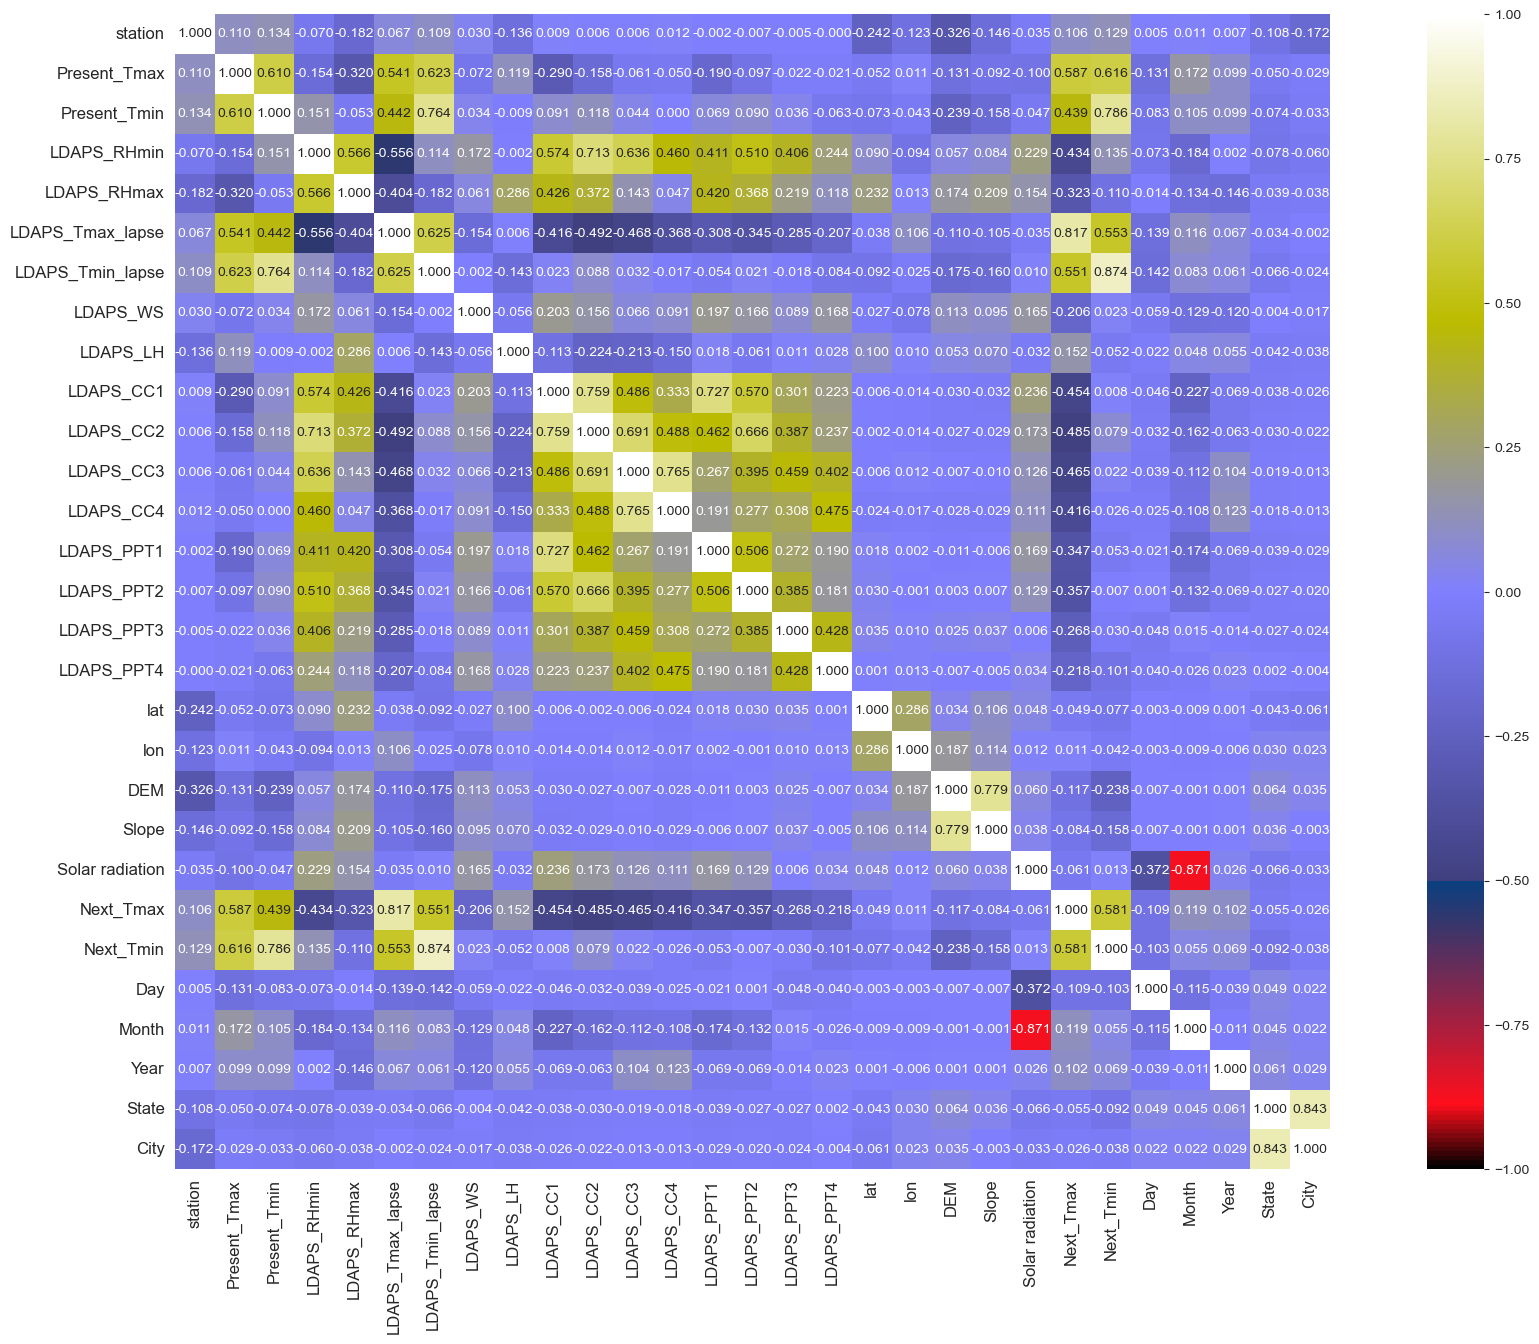

In [50]:
plt.figure(figsize=(25,15))
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, square=True, fmt='0.3f', 
            annot_kws={'size':10}, cmap="gist_stern")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

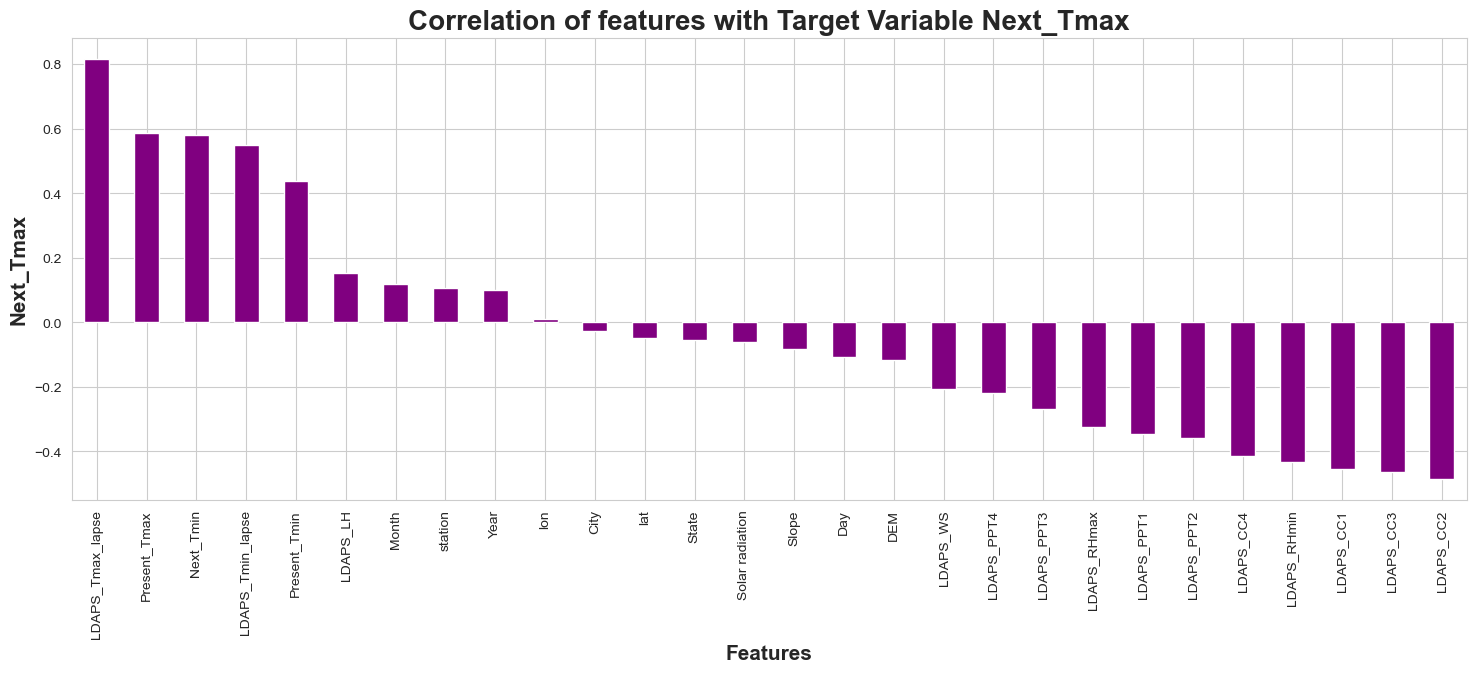

In [51]:
plt.figure(figsize = (18,6))
df.corr()['Next_Tmax'].drop(['Next_Tmax']).sort_values(ascending=False).plot(kind='bar',color = 'purple')
plt.xlabel('Features',fontsize=15,fontweight='bold')
plt.ylabel('Next_Tmax',fontsize=15,fontweight='bold')
plt.title('Correlation of features with Target Variable Next_Tmax',fontsize = 20,fontweight='bold')
plt.show()

**Temperature and cloud cover related feature are moderately or highly correlated with Target Feature.**

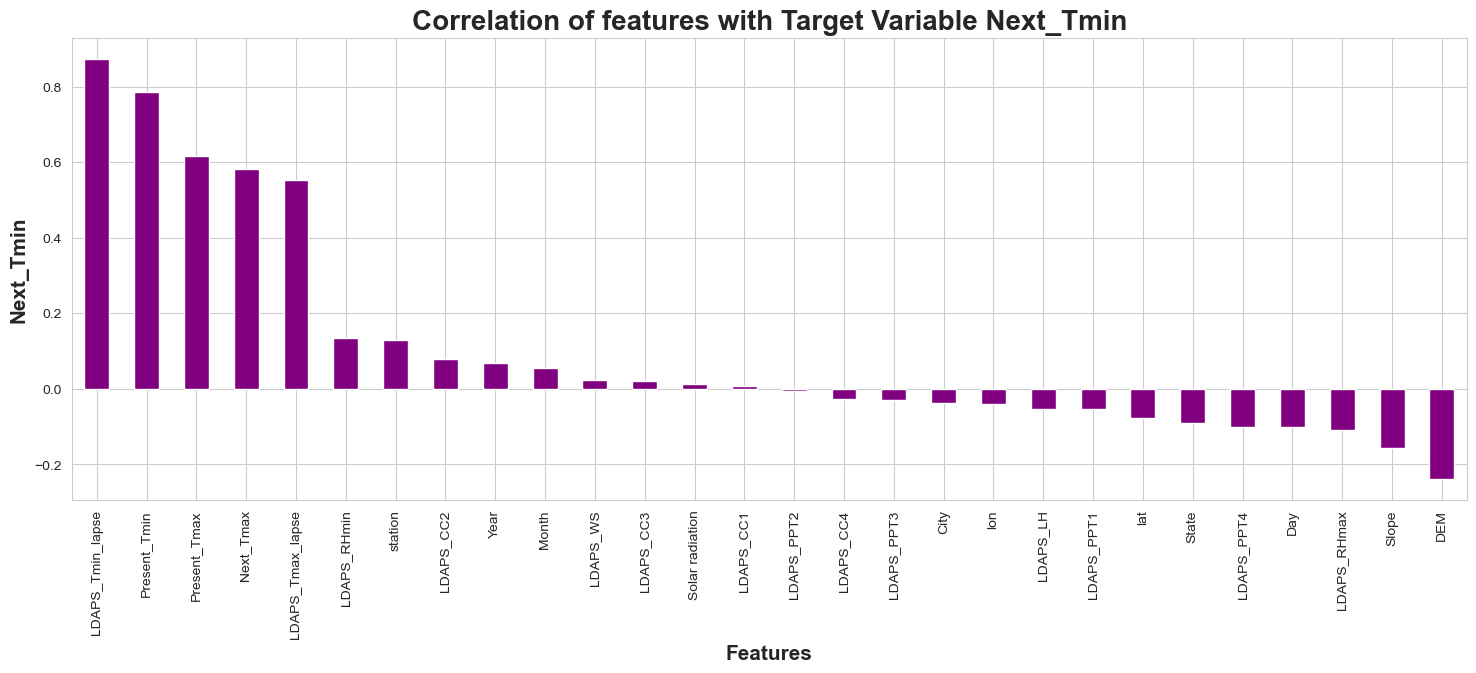

In [52]:
plt.figure(figsize = (18,6))
df.corr()['Next_Tmin'].drop(['Next_Tmin']).sort_values(ascending=False).plot(kind='bar',color = 'purple')
plt.xlabel('Features',fontsize=15,fontweight='bold')
plt.ylabel('Next_Tmin',fontsize=15,fontweight='bold')
plt.title('Correlation of features with Target Variable Next_Tmin',fontsize = 20,fontweight='bold')
plt.show()

**Temperature related feature are moderately or highly correlated with Target Feature.**
# Machine Learning Model Building For Next_Tmax

**Standard Scaling**

In [53]:
# Splitting data in target and dependent feature
X = df.drop(['Next_Tmax'], axis=1) 
Y = df['Next_Tmax']

In [54]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scale = scaler.fit_transform(X)

# Checking Multicollinearity between features using variance_inflation_factor

In [55]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(X_scale,i) for i in range(len(X.columns))]
vif["Features"] = X.columns
vif

VIF values          Features
0     1.371722           station
1     2.903305      Present_Tmax
2     3.405399      Present_Tmin
3     6.098440       LDAPS_RHmin
4     2.609329       LDAPS_RHmax
5     6.667525  LDAPS_Tmax_lapse
6     8.263539  LDAPS_Tmin_lapse
7     1.232667          LDAPS_WS
8     1.519175          LDAPS_LH
9     4.867446         LDAPS_CC1
10    5.502914         LDAPS_CC2
11    4.571289         LDAPS_CC3
12    2.788001         LDAPS_CC4
13    2.601848        LDAPS_PPT1
14    2.168774        LDAPS_PPT2
15    1.599886        LDAPS_PPT3
16    1.602887        LDAPS_PPT4
17    1.620154               lat
18    1.292628               lon
19    4.623510               DEM
20    3.086186             Slope
21  127.563080   Solar radiation
22    5.675420         Next_Tmin
23   29.643921               Day
24  109.826097             Month
25    1.138793              Year
26    3.617181             State
27    3.642125              City

**Independent feature VIF is within permissible limit of 10**

# PCA

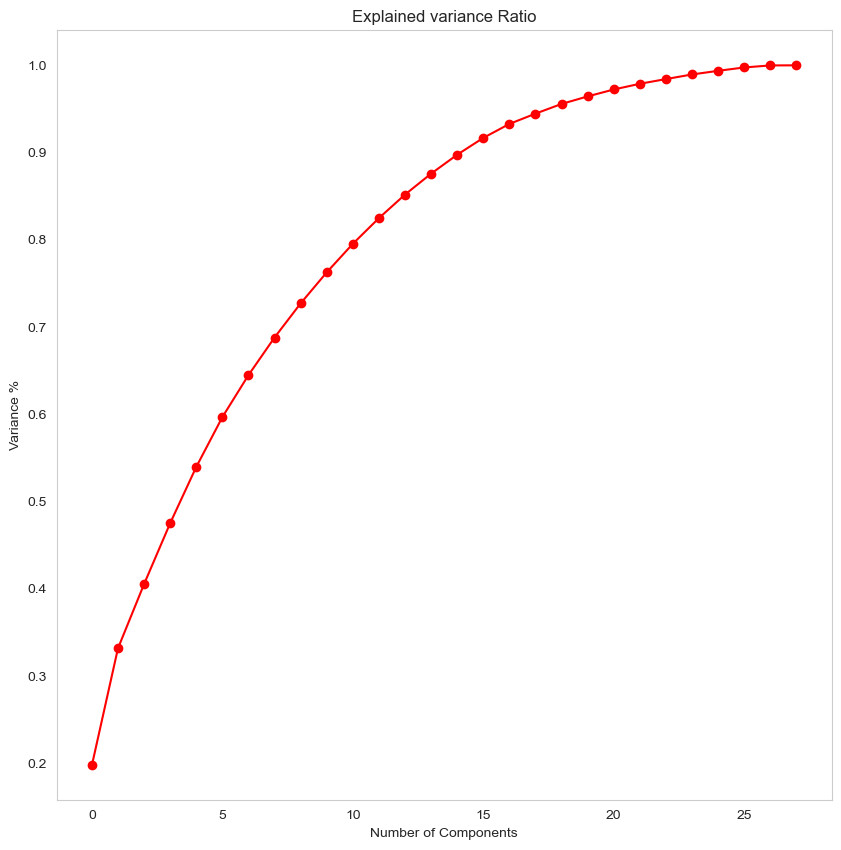

In [56]:
from sklearn.decomposition import PCA
pca = PCA()
#plot the graph to find the principal components
x_pca = pca.fit_transform(X_scale)
plt.figure(figsize=(10,10))
plt.plot(np.cumsum(pca.explained_variance_ratio_), 'ro-')
plt.xlabel('Number of Components')
plt.ylabel('Variance %')
plt.title('Explained variance Ratio')
plt.grid()

**As per the graph, we can see that 15 principal components attribute for 90% of variation in the data. We shall pick the first 15 components for our prediction.**

In [57]:
pca_new = PCA(n_components=15)
x_new = pca_new.fit_transform(X_scale)

In [58]:
principle_x = pd.DataFrame(x_new, columns=np.arange(15))

In [59]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import  Ridge
from sklearn.linear_model import  Lasso

In [60]:
X_train, X_test, Y_train, Y_test = train_test_split(principle_x, Y, random_state=42, test_size=.33)
print('Training feature matrix size:',X_train.shape)
print('Training target vector size:',Y_train.shape)
print('Test feature matrix size:',X_test.shape)
print('Test target vector size:',Y_test.shape)

Training feature matrix size: (4515, 15)
Training target vector size: (4515,)
Test feature matrix size: (2224, 15)
Test target vector size: (2224,)


**Finding best Random state**

In [61]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
maxR2_score=0
maxRS=0
for i in range(1,500):
    X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=i, test_size=.33)
    lin_reg=LinearRegression()
    lin_reg.fit(X_train,Y_train)
    y_pred=lin_reg.predict(X_test)
    R2=r2_score(Y_test,y_pred)
    if R2>maxR2_score:
        maxR2_score=R2
        maxRS=i
print('Best R2 Score is', maxR2_score ,'on Random_state', maxRS)

Best R2 Score is 0.8077797748919142 on Random_state 108


# Linear Regression Base Model

In [62]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=108, test_size=.33)
lin_reg=LinearRegression()
lin_reg.fit(X_train,Y_train)
lin_reg.score(X_train,Y_train)
y_pred=lin_reg.predict(X_test)
print('\033[1m'+'Predicted Wins:'+'\033[0m\n',y_pred)
print('\033[1m'+'Actual Wins:'+'\033[0m\n',Y_test)

Predicted Wins:
 [32.0562119  30.06822274 29.27428528 ... 25.87811141 25.10019464
 32.55957268]
Actual Wins:
 934     32.0
4582    30.1
7277    27.8
4776    27.6
3755    29.8
        ... 
7096    36.7
7148    35.4
7667    28.4
5063    24.0
4239    32.6
Name: Next_Tmax, Length: 2224, dtype: float64


In [63]:
print('\033[1m'+' Error :'+'\033[0m')
print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
print('Mean squared error :', mean_squared_error(Y_test,y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,y_pred)))
from sklearn.metrics import r2_score
print('\033[1m'+' R2 Score :'+'\033[0m')
print(r2_score(Y_test,y_pred,multioutput='variance_weighted'))

 Error :
Mean absolute error : 0.9944635693387945
Mean squared error : 1.6933572596575863
Root Mean Squared Error: 1.3012906130674986
 R2 Score :
0.8077797748919142


In [64]:
# Cross Validation
from sklearn.model_selection import cross_val_score
score = cross_val_score(lin_reg, X_scale, Y, cv =3)
print('\033[1m'+'Cross Validation Score :',lin_reg,":"+'\033[0m\n')
print("Mean CV Score :",score.mean())

Cross Validation Score : LinearRegression() :

Mean CV Score : 0.6626321287490897


**Applying other ML Models**

In [65]:
from sklearn.ensemble import BaggingRegressor

In [66]:
rf = RandomForestRegressor()
dtc = DecisionTreeRegressor()
xgb = XGBRegressor()
BR = BaggingRegressor()
model = [rf,dtc,xgb]

for m in model:
    m.fit(X_train,Y_train)
    m.score(X_train,Y_train)
    y_pred = m.predict(X_test)
    print('\n')                                        
    print('\033[1m'+' Error of ', m, ':' +'\033[0m')
    print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
    print('Mean squared error :', mean_squared_error(Y_test,y_pred))
    print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,y_pred)))

    print('\033[1m'+' R2 Score :'+'\033[0m')
    print(r2_score(Y_test,y_pred)) 
    print('==================================================')



 Error of  RandomForestRegressor() :
Mean absolute error : 0.7026614208633096
Mean squared error : 0.8746767153776981
Root Mean Squared Error: 0.9352415278299494
 R2 Score :
0.9007117050062432


 Error of  DecisionTreeRegressor() :
Mean absolute error : 1.0620503597122302
Mean squared error : 2.1179406474820146
Root Mean Squared Error: 1.4553146214760624
 R2 Score :
0.75958349857792


 Error of  XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monoto

In [67]:
# Cross Validation
model = [rf,dtc,xgb]

for m in model:
    score = cross_val_score(m, X_scale, Y, cv =5)
    print('\n')
    print('\033[1m'+'Cross Validation Score :',m,":"+'\033[0m\n')
    print("Mean CV Score :",score.mean())
    print('========================================')



Cross Validation Score : RandomForestRegressor() :

Mean CV Score : 0.6852138205970079


Cross Validation Score : DecisionTreeRegressor() :

Mean CV Score : 0.4108474754743992


Cross Validation Score : XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...) :

Mean CV Score : 0.673231521528503


# Hyper Parameter Tuning : GridSearchCV

In [68]:
from sklearn.model_selection import GridSearchCV

In [69]:
parameter = {'n_estimators':[200,400,500,600],'gamma':np.arange(0,0.2,0.1),
              'booster' : ['gbtree','dart','gblinear'], 'max_depth':[4,6,8,10],
              'eta' : [0.001, 0.01, 0.1] }

In [70]:
GCV = GridSearchCV(XGBRegressor(),parameter, verbose=10)

In [ ]:
GCV.fit(X_train,Y_train)

Fitting 5 folds for each of 288 candidates, totalling 1440 fits
[CV 1/5; 1/288] START booster=gbtree, eta=0.001, gamma=0.0, max_depth=4, n_estimators=200
[CV 1/5; 1/288] END booster=gbtree, eta=0.001, gamma=0.0, max_depth=4, n_estimators=200;, score=0.252 total time=   0.5s
[CV 2/5; 1/288] START booster=gbtree, eta=0.001, gamma=0.0, max_depth=4, n_estimators=200
[CV 2/5; 1/288] END booster=gbtree, eta=0.001, gamma=0.0, max_depth=4, n_estimators=200;, score=0.246 total time=   0.6s
[CV 3/5; 1/288] START booster=gbtree, eta=0.001, gamma=0.0, max_depth=4, n_estimators=200
[CV 3/5; 1/288] END booster=gbtree, eta=0.001, gamma=0.0, max_depth=4, n_estimators=200;, score=0.256 total time=   0.7s
[CV 4/5; 1/288] START booster=gbtree, eta=0.001, gamma=0.0, max_depth=4, n_estimators=200
[CV 4/5; 1/288] END booster=gbtree, eta=0.001, gamma=0.0, max_depth=4, n_estimators=200;, score=0.253 total time=   0.7s
[CV 5/5; 1/288] START booster=gbtree, eta=0.001, gamma=0.0, max_depth=4, n_estimators=200
[C

[CV 5/5; 8/288] END booster=gbtree, eta=0.001, gamma=0.0, max_depth=6, n_estimators=600;, score=0.585 total time=   4.4s
[CV 1/5; 9/288] START booster=gbtree, eta=0.001, gamma=0.0, max_depth=8, n_estimators=200
[CV 1/5; 9/288] END booster=gbtree, eta=0.001, gamma=0.0, max_depth=8, n_estimators=200;, score=0.267 total time=   4.3s
[CV 2/5; 9/288] START booster=gbtree, eta=0.001, gamma=0.0, max_depth=8, n_estimators=200
[CV 2/5; 9/288] END booster=gbtree, eta=0.001, gamma=0.0, max_depth=8, n_estimators=200;, score=0.260 total time=   4.5s
[CV 3/5; 9/288] START booster=gbtree, eta=0.001, gamma=0.0, max_depth=8, n_estimators=200
[CV 3/5; 9/288] END booster=gbtree, eta=0.001, gamma=0.0, max_depth=8, n_estimators=200;, score=0.270 total time=   3.9s
[CV 4/5; 9/288] START booster=gbtree, eta=0.001, gamma=0.0, max_depth=8, n_estimators=200
[CV 4/5; 9/288] END booster=gbtree, eta=0.001, gamma=0.0, max_depth=8, n_estimators=200;, score=0.270 total time=   3.8s
[CV 5/5; 9/288] START booster=gbtre

[CV 4/5; 16/288] END booster=gbtree, eta=0.001, gamma=0.0, max_depth=10, n_estimators=600;, score=0.586 total time=  27.1s
[CV 5/5; 16/288] START booster=gbtree, eta=0.001, gamma=0.0, max_depth=10, n_estimators=600
[CV 5/5; 16/288] END booster=gbtree, eta=0.001, gamma=0.0, max_depth=10, n_estimators=600;, score=0.598 total time=  26.5s
[CV 1/5; 17/288] START booster=gbtree, eta=0.001, gamma=0.1, max_depth=4, n_estimators=200
[CV 1/5; 17/288] END booster=gbtree, eta=0.001, gamma=0.1, max_depth=4, n_estimators=200;, score=0.252 total time=   0.5s
[CV 2/5; 17/288] START booster=gbtree, eta=0.001, gamma=0.1, max_depth=4, n_estimators=200
[CV 2/5; 17/288] END booster=gbtree, eta=0.001, gamma=0.1, max_depth=4, n_estimators=200;, score=0.246 total time=   0.5s
[CV 3/5; 17/288] START booster=gbtree, eta=0.001, gamma=0.1, max_depth=4, n_estimators=200
[CV 3/5; 17/288] END booster=gbtree, eta=0.001, gamma=0.1, max_depth=4, n_estimators=200;, score=0.256 total time=   0.5s
[CV 4/5; 17/288] START 

[CV 3/5; 24/288] END booster=gbtree, eta=0.001, gamma=0.1, max_depth=6, n_estimators=600;, score=0.569 total time=   4.3s
[CV 4/5; 24/288] START booster=gbtree, eta=0.001, gamma=0.1, max_depth=6, n_estimators=600
[CV 4/5; 24/288] END booster=gbtree, eta=0.001, gamma=0.1, max_depth=6, n_estimators=600;, score=0.571 total time=   5.6s
[CV 5/5; 24/288] START booster=gbtree, eta=0.001, gamma=0.1, max_depth=6, n_estimators=600
[CV 5/5; 24/288] END booster=gbtree, eta=0.001, gamma=0.1, max_depth=6, n_estimators=600;, score=0.585 total time=   4.6s
[CV 1/5; 25/288] START booster=gbtree, eta=0.001, gamma=0.1, max_depth=8, n_estimators=200
[CV 1/5; 25/288] END booster=gbtree, eta=0.001, gamma=0.1, max_depth=8, n_estimators=200;, score=0.267 total time=   4.2s
[CV 2/5; 25/288] START booster=gbtree, eta=0.001, gamma=0.1, max_depth=8, n_estimators=200
[CV 2/5; 25/288] END booster=gbtree, eta=0.001, gamma=0.1, max_depth=8, n_estimators=200;, score=0.260 total time=   4.4s
[CV 3/5; 25/288] START boo

[CV 2/5; 32/288] END booster=gbtree, eta=0.001, gamma=0.1, max_depth=10, n_estimators=600;, score=0.561 total time=  26.0s
[CV 3/5; 32/288] START booster=gbtree, eta=0.001, gamma=0.1, max_depth=10, n_estimators=600
[CV 3/5; 32/288] END booster=gbtree, eta=0.001, gamma=0.1, max_depth=10, n_estimators=600;, score=0.586 total time=  23.4s
[CV 4/5; 32/288] START booster=gbtree, eta=0.001, gamma=0.1, max_depth=10, n_estimators=600
[CV 4/5; 32/288] END booster=gbtree, eta=0.001, gamma=0.1, max_depth=10, n_estimators=600;, score=0.586 total time=  25.3s
[CV 5/5; 32/288] START booster=gbtree, eta=0.001, gamma=0.1, max_depth=10, n_estimators=600
[CV 5/5; 32/288] END booster=gbtree, eta=0.001, gamma=0.1, max_depth=10, n_estimators=600;, score=0.599 total time=  24.3s
[CV 1/5; 33/288] START booster=gbtree, eta=0.01, gamma=0.0, max_depth=4, n_estimators=200
[CV 1/5; 33/288] END booster=gbtree, eta=0.01, gamma=0.0, max_depth=4, n_estimators=200;, score=0.808 total time=   0.7s
[CV 2/5; 33/288] STAR

[CV 1/5; 40/288] END booster=gbtree, eta=0.01, gamma=0.0, max_depth=6, n_estimators=600;, score=0.909 total time=   4.4s
[CV 2/5; 40/288] START booster=gbtree, eta=0.01, gamma=0.0, max_depth=6, n_estimators=600
[CV 2/5; 40/288] END booster=gbtree, eta=0.01, gamma=0.0, max_depth=6, n_estimators=600;, score=0.904 total time=   4.2s
[CV 3/5; 40/288] START booster=gbtree, eta=0.01, gamma=0.0, max_depth=6, n_estimators=600
[CV 3/5; 40/288] END booster=gbtree, eta=0.01, gamma=0.0, max_depth=6, n_estimators=600;, score=0.896 total time=   5.1s
[CV 4/5; 40/288] START booster=gbtree, eta=0.01, gamma=0.0, max_depth=6, n_estimators=600
[CV 4/5; 40/288] END booster=gbtree, eta=0.01, gamma=0.0, max_depth=6, n_estimators=600;, score=0.913 total time=   4.5s
[CV 5/5; 40/288] START booster=gbtree, eta=0.01, gamma=0.0, max_depth=6, n_estimators=600
[CV 5/5; 40/288] END booster=gbtree, eta=0.01, gamma=0.0, max_depth=6, n_estimators=600;, score=0.917 total time=   4.1s
[CV 1/5; 41/288] START booster=gbtr

[CV 5/5; 47/288] END booster=gbtree, eta=0.01, gamma=0.0, max_depth=10, n_estimators=500;, score=0.908 total time=  22.2s
[CV 1/5; 48/288] START booster=gbtree, eta=0.01, gamma=0.0, max_depth=10, n_estimators=600
[CV 1/5; 48/288] END booster=gbtree, eta=0.01, gamma=0.0, max_depth=10, n_estimators=600;, score=0.899 total time=  26.6s
[CV 2/5; 48/288] START booster=gbtree, eta=0.01, gamma=0.0, max_depth=10, n_estimators=600
[CV 2/5; 48/288] END booster=gbtree, eta=0.01, gamma=0.0, max_depth=10, n_estimators=600;, score=0.890 total time=  26.0s
[CV 3/5; 48/288] START booster=gbtree, eta=0.01, gamma=0.0, max_depth=10, n_estimators=600
[CV 3/5; 48/288] END booster=gbtree, eta=0.01, gamma=0.0, max_depth=10, n_estimators=600;, score=0.891 total time=  26.5s
[CV 4/5; 48/288] START booster=gbtree, eta=0.01, gamma=0.0, max_depth=10, n_estimators=600
[CV 4/5; 48/288] END booster=gbtree, eta=0.01, gamma=0.0, max_depth=10, n_estimators=600;, score=0.908 total time=  25.7s
[CV 5/5; 48/288] START boo

[CV 4/5; 55/288] END booster=gbtree, eta=0.01, gamma=0.1, max_depth=6, n_estimators=500;, score=0.910 total time=   3.9s
[CV 5/5; 55/288] START booster=gbtree, eta=0.01, gamma=0.1, max_depth=6, n_estimators=500
[CV 5/5; 55/288] END booster=gbtree, eta=0.01, gamma=0.1, max_depth=6, n_estimators=500;, score=0.912 total time=   3.7s
[CV 1/5; 56/288] START booster=gbtree, eta=0.01, gamma=0.1, max_depth=6, n_estimators=600
[CV 1/5; 56/288] END booster=gbtree, eta=0.01, gamma=0.1, max_depth=6, n_estimators=600;, score=0.909 total time=   5.2s
[CV 2/5; 56/288] START booster=gbtree, eta=0.01, gamma=0.1, max_depth=6, n_estimators=600
[CV 2/5; 56/288] END booster=gbtree, eta=0.01, gamma=0.1, max_depth=6, n_estimators=600;, score=0.903 total time=   4.4s
[CV 3/5; 56/288] START booster=gbtree, eta=0.01, gamma=0.1, max_depth=6, n_estimators=600
[CV 3/5; 56/288] END booster=gbtree, eta=0.01, gamma=0.1, max_depth=6, n_estimators=600;, score=0.897 total time=   4.0s
[CV 4/5; 56/288] START booster=gbtr

[CV 3/5; 63/288] END booster=gbtree, eta=0.01, gamma=0.1, max_depth=10, n_estimators=500;, score=0.890 total time=  16.4s
[CV 4/5; 63/288] START booster=gbtree, eta=0.01, gamma=0.1, max_depth=10, n_estimators=500
[CV 4/5; 63/288] END booster=gbtree, eta=0.01, gamma=0.1, max_depth=10, n_estimators=500;, score=0.909 total time=  16.2s
[CV 5/5; 63/288] START booster=gbtree, eta=0.01, gamma=0.1, max_depth=10, n_estimators=500
[CV 5/5; 63/288] END booster=gbtree, eta=0.01, gamma=0.1, max_depth=10, n_estimators=500;, score=0.910 total time=  16.6s
[CV 1/5; 64/288] START booster=gbtree, eta=0.01, gamma=0.1, max_depth=10, n_estimators=600
[CV 1/5; 64/288] END booster=gbtree, eta=0.01, gamma=0.1, max_depth=10, n_estimators=600;, score=0.900 total time=  18.6s
[CV 2/5; 64/288] START booster=gbtree, eta=0.01, gamma=0.1, max_depth=10, n_estimators=600
[CV 2/5; 64/288] END booster=gbtree, eta=0.01, gamma=0.1, max_depth=10, n_estimators=600;, score=0.891 total time=  17.8s
[CV 3/5; 64/288] START boo

[CV 3/5; 71/288] END booster=gbtree, eta=0.1, gamma=0.0, max_depth=6, n_estimators=500;, score=0.918 total time=   3.5s
[CV 4/5; 71/288] START booster=gbtree, eta=0.1, gamma=0.0, max_depth=6, n_estimators=500
[CV 4/5; 71/288] END booster=gbtree, eta=0.1, gamma=0.0, max_depth=6, n_estimators=500;, score=0.932 total time=   3.5s
[CV 5/5; 71/288] START booster=gbtree, eta=0.1, gamma=0.0, max_depth=6, n_estimators=500
[CV 5/5; 71/288] END booster=gbtree, eta=0.1, gamma=0.0, max_depth=6, n_estimators=500;, score=0.937 total time=   3.1s
[CV 1/5; 72/288] START booster=gbtree, eta=0.1, gamma=0.0, max_depth=6, n_estimators=600
[CV 1/5; 72/288] END booster=gbtree, eta=0.1, gamma=0.0, max_depth=6, n_estimators=600;, score=0.931 total time=   3.9s
[CV 2/5; 72/288] START booster=gbtree, eta=0.1, gamma=0.0, max_depth=6, n_estimators=600
[CV 2/5; 72/288] END booster=gbtree, eta=0.1, gamma=0.0, max_depth=6, n_estimators=600;, score=0.925 total time=   3.9s
[CV 3/5; 72/288] START booster=gbtree, eta=0

[CV 3/5; 79/288] END booster=gbtree, eta=0.1, gamma=0.0, max_depth=10, n_estimators=500;, score=0.896 total time=  11.9s
[CV 4/5; 79/288] START booster=gbtree, eta=0.1, gamma=0.0, max_depth=10, n_estimators=500
[CV 4/5; 79/288] END booster=gbtree, eta=0.1, gamma=0.0, max_depth=10, n_estimators=500;, score=0.911 total time=   9.1s
[CV 5/5; 79/288] START booster=gbtree, eta=0.1, gamma=0.0, max_depth=10, n_estimators=500
[CV 5/5; 79/288] END booster=gbtree, eta=0.1, gamma=0.0, max_depth=10, n_estimators=500;, score=0.913 total time=  10.0s
[CV 1/5; 80/288] START booster=gbtree, eta=0.1, gamma=0.0, max_depth=10, n_estimators=600
[CV 1/5; 80/288] END booster=gbtree, eta=0.1, gamma=0.0, max_depth=10, n_estimators=600;, score=0.900 total time=   9.4s
[CV 2/5; 80/288] START booster=gbtree, eta=0.1, gamma=0.0, max_depth=10, n_estimators=600
[CV 2/5; 80/288] END booster=gbtree, eta=0.1, gamma=0.0, max_depth=10, n_estimators=600;, score=0.892 total time=   9.5s
[CV 3/5; 80/288] START booster=gbtr

[CV 3/5; 87/288] END booster=gbtree, eta=0.1, gamma=0.1, max_depth=6, n_estimators=500;, score=0.912 total time=   1.1s
[CV 4/5; 87/288] START booster=gbtree, eta=0.1, gamma=0.1, max_depth=6, n_estimators=500
[CV 4/5; 87/288] END booster=gbtree, eta=0.1, gamma=0.1, max_depth=6, n_estimators=500;, score=0.929 total time=   1.1s
[CV 5/5; 87/288] START booster=gbtree, eta=0.1, gamma=0.1, max_depth=6, n_estimators=500
[CV 5/5; 87/288] END booster=gbtree, eta=0.1, gamma=0.1, max_depth=6, n_estimators=500;, score=0.930 total time=   1.1s
[CV 1/5; 88/288] START booster=gbtree, eta=0.1, gamma=0.1, max_depth=6, n_estimators=600
[CV 1/5; 88/288] END booster=gbtree, eta=0.1, gamma=0.1, max_depth=6, n_estimators=600;, score=0.923 total time=   1.1s
[CV 2/5; 88/288] START booster=gbtree, eta=0.1, gamma=0.1, max_depth=6, n_estimators=600
[CV 2/5; 88/288] END booster=gbtree, eta=0.1, gamma=0.1, max_depth=6, n_estimators=600;, score=0.917 total time=   1.2s
[CV 3/5; 88/288] START booster=gbtree, eta=0

[CV 3/5; 95/288] END booster=gbtree, eta=0.1, gamma=0.1, max_depth=10, n_estimators=500;, score=0.890 total time=   2.0s
[CV 4/5; 95/288] START booster=gbtree, eta=0.1, gamma=0.1, max_depth=10, n_estimators=500
[CV 4/5; 95/288] END booster=gbtree, eta=0.1, gamma=0.1, max_depth=10, n_estimators=500;, score=0.908 total time=   3.5s
[CV 5/5; 95/288] START booster=gbtree, eta=0.1, gamma=0.1, max_depth=10, n_estimators=500
[CV 5/5; 95/288] END booster=gbtree, eta=0.1, gamma=0.1, max_depth=10, n_estimators=500;, score=0.910 total time=   3.3s
[CV 1/5; 96/288] START booster=gbtree, eta=0.1, gamma=0.1, max_depth=10, n_estimators=600
[CV 1/5; 96/288] END booster=gbtree, eta=0.1, gamma=0.1, max_depth=10, n_estimators=600;, score=0.900 total time=   2.3s
[CV 2/5; 96/288] START booster=gbtree, eta=0.1, gamma=0.1, max_depth=10, n_estimators=600
[CV 2/5; 96/288] END booster=gbtree, eta=0.1, gamma=0.1, max_depth=10, n_estimators=600;, score=0.887 total time=   2.1s
[CV 3/5; 96/288] START booster=gbtr

In [74]:
GCV.best_params_

AttributeError: 'GridSearchCV' object has no attribute 'best_params_'

# Final Regression Model

In [75]:
Final_mod =  XGBRegressor(n_estimators=100 , booster= 'dart', eta= 0.1, max_depth= 10, gamma= 0.0 )
Final_mod.fit(X_train,Y_train)
y_pred=Final_mod.predict(X_test)
print('\n')                                        
print('\033[1m'+' Error in Final Model :' +'\033[0m')
print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
print('Mean squared error :', mean_squared_error(Y_test,y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,y_pred)))
print('\033[1m'+' R2 Score of Final Model :'+'\033[0m')
print(r2_score(Y_test,y_pred)) 
print('\n')



 Error in Final Model :
Mean absolute error : 0.6525314994853177
Mean squared error : 0.7732889392970416
Root Mean Squared Error: 0.8793684889152223
 R2 Score of Final Model :
0.9122206651091884




 True Values Vs Predicted Value plot :


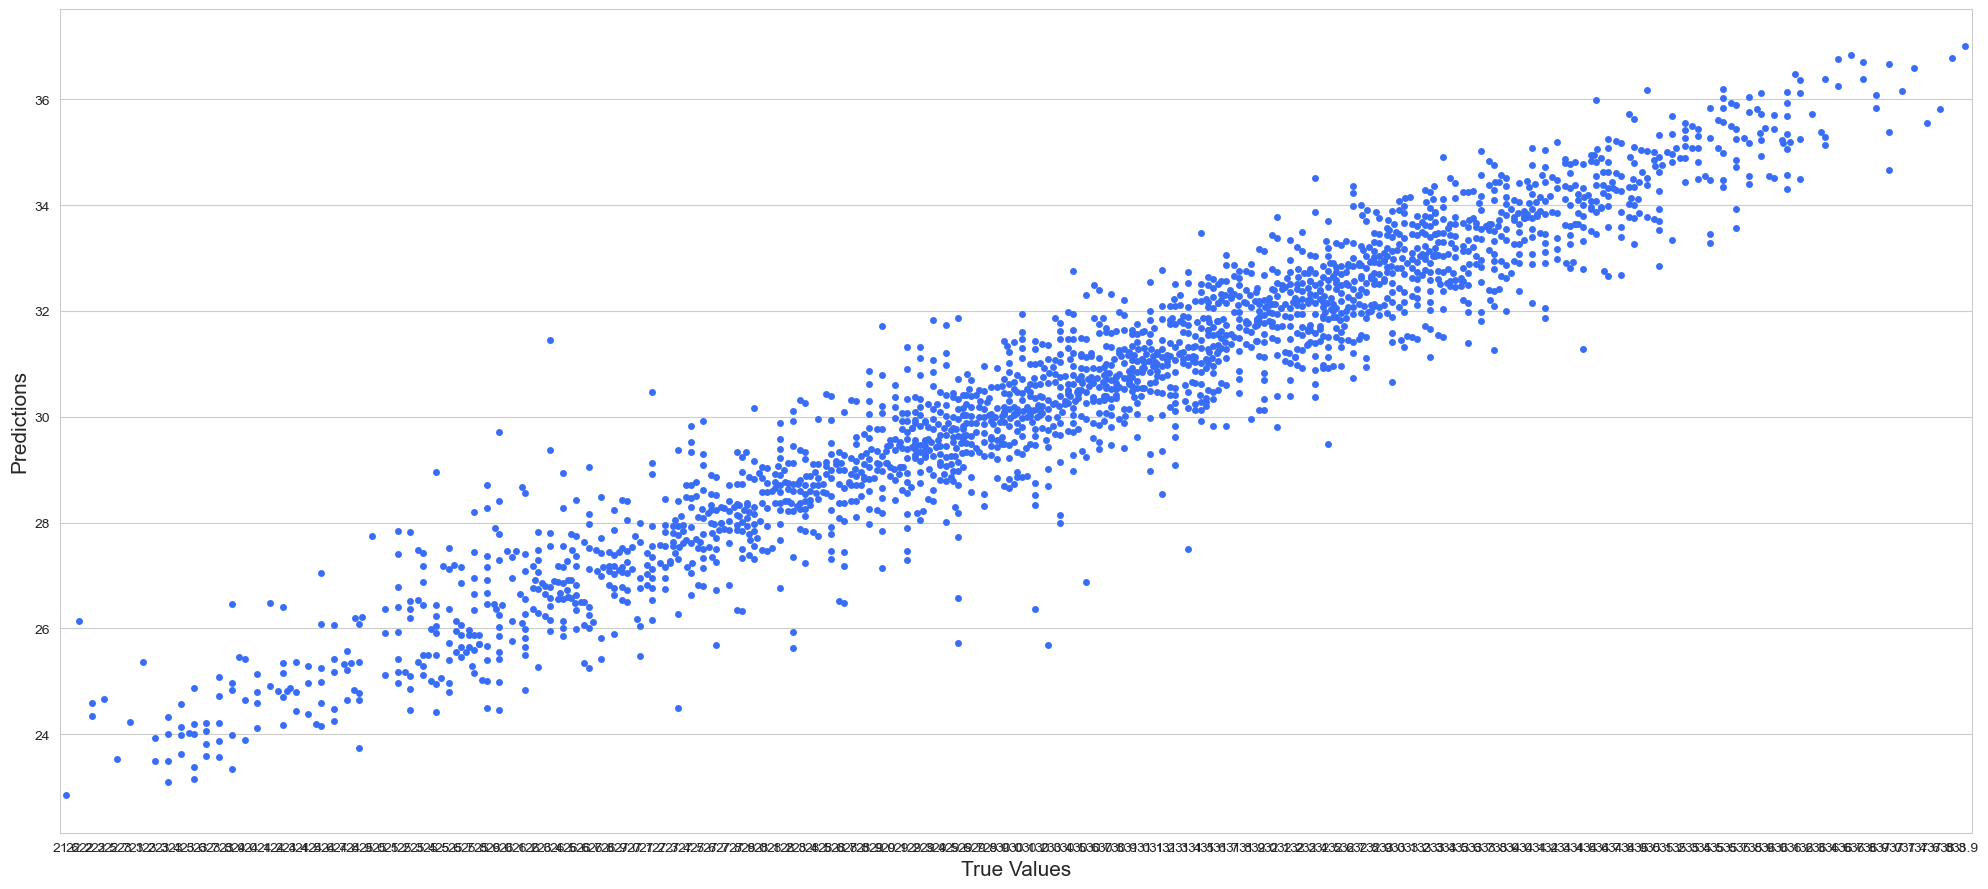

In [78]:
plt.figure(figsize=(20,9))
y_pred=Final_mod.predict(X_test)
sns.swarmplot(x=Y_test.round(2), y=y_pred)
print('\033[1m'+' True Values Vs Predicted Value plot :' +'\033[0m')
plt.xlabel('True Values' , fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.tight_layout()

# Final Regression Saving Model

In [79]:
import joblib
joblib.dump(Final_mod,'Next_Tmax_Forecast_Final.pkl')

['Next_Tmax_Forecast_Final.pkl']

**Prediction According Final Regression Model**

In [80]:
# Loading the saved model
Model = joblib.load("Next_Tmax_Forecast_Final.pkl")

# prediction  DataFrame
actual = np.array(Y_test)
predicted = np.array(Model.predict(X_test))
df_Predicted = pd.DataFrame({"Actual Values":actual,"Predicted Values":predicted},index= range(len(actual)))
df_Predicted

Actual Values  Predicted Values
0              32.0         31.406107
1              30.1         29.811975
2              27.8         28.705191
3              27.6         27.133572
4              29.8         30.186239
...             ...               ...
2219           36.7         36.840958
2220           35.4         34.493851
2221           28.4         27.235561
2222           24.0         23.885286
2223           32.6         32.189850

[2224 rows x 2 columns]

# Machine Learning Model Building For Next_Tmin

**Standard Scaling**

In [81]:
# Splitting data in target and dependent feature
X = df.drop(['Next_Tmin'], axis =1)
Y = df['Next_Tmin']

In [82]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_scale = scaler.fit_transform(X)

In [83]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=42, test_size=.33)
print('Training feature matrix size:',X_train.shape)
print('Training target vector size:',Y_train.shape)
print('Test feature matrix size:',X_test.shape)
print('Test target vector size:',Y_test.shape)

Training feature matrix size: (4515, 28)
Training target vector size: (4515,)
Test feature matrix size: (2224, 28)
Test target vector size: (2224,)


**Finding best Random state**

In [84]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
maxR2_score=0
maxRS=0
for i in range(1,500):
    X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=i, test_size=.33)
    lin_reg=LinearRegression()
    lin_reg.fit(X_train,Y_train)
    y_pred=lin_reg.predict(X_test)
    R2=r2_score(Y_test,y_pred)
    if R2>maxR2_score:
        maxR2_score=R2
        maxRS=i
print('Best R2 Score is', maxR2_score ,'on Random_state', maxRS)

Best R2 Score is 0.8526534425534574 on Random_state 288


**Linear Regression Base Model**

In [85]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=288, test_size=.33)
lin_reg=LinearRegression()
lin_reg.fit(X_train,Y_train)
lin_reg.score(X_train,Y_train)
y_pred=lin_reg.predict(X_test)
print('\033[1m'+'Predicted Wins:'+'\033[0m\n',y_pred)
print('\n')
print('\033[1m'+'Actual Wins:'+'\033[0m\n',Y_test)

Predicted Wins:
 [21.85260854 20.86156502 28.0349405  ... 22.70792684 25.11551663
 21.6513865 ]


Actual Wins:
 4299    20.9
4620    21.4
5923    28.6
4025    22.1
7478    23.4
        ... 
1504    22.8
1671    22.4
2267    23.5
6035    23.0
4925    20.5
Name: Next_Tmin, Length: 2224, dtype: float64


**Linear Regression Evaluation Matrix**

In [86]:
print('\033[1m'+' Error :'+'\033[0m')
print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
print('Mean squared error :', mean_squared_error(Y_test,y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,y_pred)))
from sklearn.metrics import r2_score
print('\033[1m'+' R2 Score :'+'\033[0m')
print(r2_score(Y_test,y_pred,multioutput='variance_weighted'))

 Error :
Mean absolute error : 0.733003265519663
Mean squared error : 0.8622090986236224
Root Mean Squared Error: 0.9285521518060375
 R2 Score :
0.8526534425534573


In [87]:
# Cross Validation
from sklearn.model_selection import cross_val_score
score = cross_val_score(lin_reg, X_scale, Y, cv =3)
print('\033[1m'+'Cross Validation Score :',lin_reg,":"+'\033[0m\n')
print("Mean CV Score :",score.mean())

Cross Validation Score : LinearRegression() :

Mean CV Score : 0.7870765967641132


**Applying other ML models**

In [88]:
rf = RandomForestRegressor()
dtc = DecisionTreeRegressor()
BR = BaggingRegressor()
xgb=XGBRegressor()
model = [rf,dtc,xgb]

for m in model:
    m.fit(X_train,Y_train)
    m.score(X_train,Y_train)
    y_pred = m.predict(X_test)
    print('\n')                                        
    print('\033[1m'+' Error of ', m, ':' +'\033[0m')
    print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
    print('Mean squared error :', mean_squared_error(Y_test,y_pred))
    print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,y_pred)))
    print('\n')

    print('\033[1m'+' R2 Score :'+'\033[0m')
    print(r2_score(Y_test,y_pred)) 
    print('========================================================')



 Error of  RandomForestRegressor() :
Mean absolute error : 0.5543826438848919
Mean squared error : 0.5363205858812948
Root Mean Squared Error: 0.7323391194530678


 R2 Score :
0.9083459080361455


 Error of  DecisionTreeRegressor() :
Mean absolute error : 0.8312050359712231
Mean squared error : 1.187203237410072
Root Mean Squared Error: 1.0895885633623694


 R2 Score :
0.7971138204166338


 Error of  XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, m

In [89]:
# Cross Validation
model = [rf,dtc,xgb]

for m in model:
    score = cross_val_score(m, X_scale, Y, cv =5)
    print('\n')
    print('\033[1m'+'Cross Validation Score :',m,":"+'\033[0m\n')
    print("Mean CV Score :",score.mean())
    print('======================================================')



Cross Validation Score : RandomForestRegressor() :

Mean CV Score : 0.7937224935645831


Cross Validation Score : DecisionTreeRegressor() :

Mean CV Score : 0.6063671136627851


Cross Validation Score : XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...) :

Mean CV Score : 0.7848265773240158


# Hyper Parameter Tuning : GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
parameter = {'n_estimators':[50,75,100],'gamma':np.arange(0,0.2,0.1),
              'booster' : ['gbtree','dart','gblinear'], 'max_depth':[4,6,8,10],
              'eta' : [0.001, 0.01, 0.1] }

In [ ]:
GCV = GridSearchCV(XGBRegressor(),parameter,verbose =10)
GCV.fit(X_train,Y_train)

# Final Regression Model For Next_Tmin

In [ ]:
Final_mod =  XGBRegressor(n_estimators=100 , booster= 'dart', eta= 0.1, max_depth= 8, gamma= 0.0 )
Final_mod.fit(X_train,Y_train)
y_pred=Final_mod.predict(X_test)
print('\n')                                        
print('\033[1m'+' Error in Final Model :' +'\033[0m')
print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
print('Mean squared error :', mean_squared_error(Y_test,y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,y_pred)))
print('\n')
print('\033[1m'+' R2 Score of Final Model :'+'\033[0m')
print(r2_score(Y_test,y_pred)) 
print('\n')

In [ ]:
plt.figure(figsize=(12,7))
y_pred=Final_mod.predict(X_test)
sns.swarmplot(Y_test.round(2), y_pred)
print('\033[1m'+' True Values Vs Predicted Value plot :' +'\033[0m')
plt.xlabel('True Values' , fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.tight_layout()

**Saving Final Regression Model For Next_Tmin**

In [ ]:
import joblib
joblib.dump(Final_mod,'Next_Tmin_Forecast_Final.pkl')

**Prediction According Final Regression Model For Next_Tmin**

In [ ]:
# Loading the saved model
Model = joblib.load("Next_Tmin_Forecast_Final.pkl")

# prediction  DataFrame
actual = np.array(Y_test)
predicted = np.array(Model.predict(X_test))
df_Predicted = pd.DataFrame({"Actual Values":actual,"Predicted Values":predicted},index= range(len(actual)))
df_Predicted 